# Práctica 4. Gramáticas de gráficos

## Introducción

El libro de Leland Wilkinson *The Grammar of Graphics* (1999) es un clásico entre los libros de visualización de datos. En él, Wilkinson propone un framework que unifica el diseño, implementación e interpretación de un gráfico. La *gramática de gráficos* se ha hecho especialmente famosa tras su implementación en el paquete de R [ggplot2](https://ggplot2.tidyverse.org/). También existe una versión de este paquete para Python, [plotnine](https://plotnine.org/). Este último, aunque no tan completo como el de R, está siendo desarrollado activamente y teniendo un crecimiento importante en los últimos años.

En esta sesión exploraremos algunas de las ideas principales que subyacen a esta *gramática de gráficos*. Comencemos repasando el concepto de *gramática de gráficos*.

Una *gramática de gráficos* es una herramienta que permite describir de forma concisa los componenentes de una gráfica. Dicha gramática nos proporciona la posibilidad de superar los gráficos prefabricados (como los que encontramos en Microsoft Excel) y profundizar en la estructura que subyace a todos los gráficos estadísticos. En la *aproximación Excel* elegimos un tipo de gráfico entre una lista de posibilidades predefinas para representar nuestros datos: por ejemplo, un *gráfico de barras*, un *gráfico circular* o un *gráfico de líneas*. Lo cierto es que esta forma de construir gráficas no incita a la reflexión. Por otra parte, para comprender la *gramática de gráficos* tenemos que considerar cómo se construyen las gráficas.

## Construir un gráfico con plotnine (`ggplot`)

Hay dos principios fundamentales a tener en cuenta a la hora de intentar construir un gráfico siguiendo la metodología de la *gramática de gráficos*:

* *Gráficos*: distintas capas formadas por *elementos gramaticales* (piezas mínimas para la construcción de gráficas).
* *Mapeado estético*: los gráficos más utiles se obtienen mediante un buen mapeado de las variables a atributos estéticos.

Hay siete elementos gramaticales en `ggplot`, de los cuáles sólo los tres primeros son imprescindibles:

* **Datos**: los datos a representar en formato `pandas.DataFrame`.
* **Elementos estéticos**: los atributos visuales en los que mapearemos los datos.
* **Geometrías**: los elementos visuales que emplearemos para representar los datos.
* **Facetas**: forma de representación que nos permitirá representar subconjuntos de datos.
* **Estadísticos**: representaciones estadísticas de los datos.
* **Coordenadas**: el sistema de coordenadas empleado para representar los datos (cartesiano  o polar).
* **Anotaciones y temas**: todas las representaciones sin relación directa con los datos (el fondo del gráfico o su título, por ejemplo).

Estos elementos gramaticales se combinan en forma de capas para construir un gráfico. De esta forma, el proceso de construcción de un gráfico básico en `ggplot` se puede resumir como sigue:

* Cada una de las variables que deseamos representar la **mapeamos** a algún atributo estético (*aesthetic*, más sobre esto después). Por ejemplo, para hacer un *diagrama de dispersión* de A frente a B mapeamos A al atributo *posición en el eje x* y B al atributo *posición en el eje y*.  Este proceso puede representarse mediante la creación de otro `DataFrame`: ![Mapeo de atributos](ficheros/ggmapping.png)
* Mediante el mapeado que hemos hecho antes, podemos generar gráficos distintos dependiento del tipo de **geometría** que empleamos para representar los atributos estéticos. Por ejemplo, si dibujamos puntos obtendremos un *diagrama de dispersión*, si usamos líneas una *gráfica de líneas*, y si usamos barras un *gráfico de barras*.
* Para crear el gráfico final tenemos que combinar objetos gráficos procedentes de tres fuentes: (1) nuestros **datos** (con sus **atributos estéticos y geometrías** asociadas); (2) las **escalas** (lineal, logarítmica) y el **sistema de coordenadas** (representación cartesiana o polar); y (3) las **anotaciones y temas** (como el fondo del gráfico o el título). Estos elementos y su combinación para formar el gráfico final pueden verse en la figura siguiente: ![Elementos gramaticales](ficheros/grammatic_elements.png)

Esta explicación teórica es posiblemente difícil de digerir, así que lo mejor es ver un ejemplo con `ggplot` para intentar aclarar ideas. En primer lugar debemos instalar el paquete plotnine:

```
conda install -c conda-forge plotnine
```

A continuación cargamos la librería. Además, para ilustrar la esencia de construir un gráfico vamos a empezar por emplear el dataset [diamonds](https://plotnine.org/reference/diamonds.html) proporcionado en el paquete plotnine.

In [1]:
import pandas as pd
import numpy as np

from plotnine import *
from plotnine.data import *

%matplotlib inline

diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Vamos a crear un diagrama de dispersión del precio de los diamantes *versus* los quilates. Para ello, el primer paso sería definir el **mapeado** de nuestros datos (contenidos en la tabla `diamonds`) a los atributos estéticos deseados: *price* al atributo *posición en el eje y* y *carat* al atributo *posición en el eje x*. En `ggplot` esto se especificaría de la siguiente forma:

In [2]:
# aes es una función que especifica los "aesthetics" del gráfico
p = ggplot(diamonds, aes(x='carat', y='price'))

No aparece ningún gráfico, lo cual es normal. Hasta el momento, solo hemos construido la primera capa de nuestra gráfica, pero todavía no hemos renderizado nada. Como vemos, es posible almacenar los pasos intermedios en una variable.

La siguiente capa que añadiremos será la de **geometrías**. Esta es la última capa necesaria para crear un gráfico (vease la explicación anterior) ya que `ggplot` completará nuestra especificación mediante capas por defecto para completar el *plot*. La geometría adecuada para realizar un diagrama de dispersión es `geom_point`:

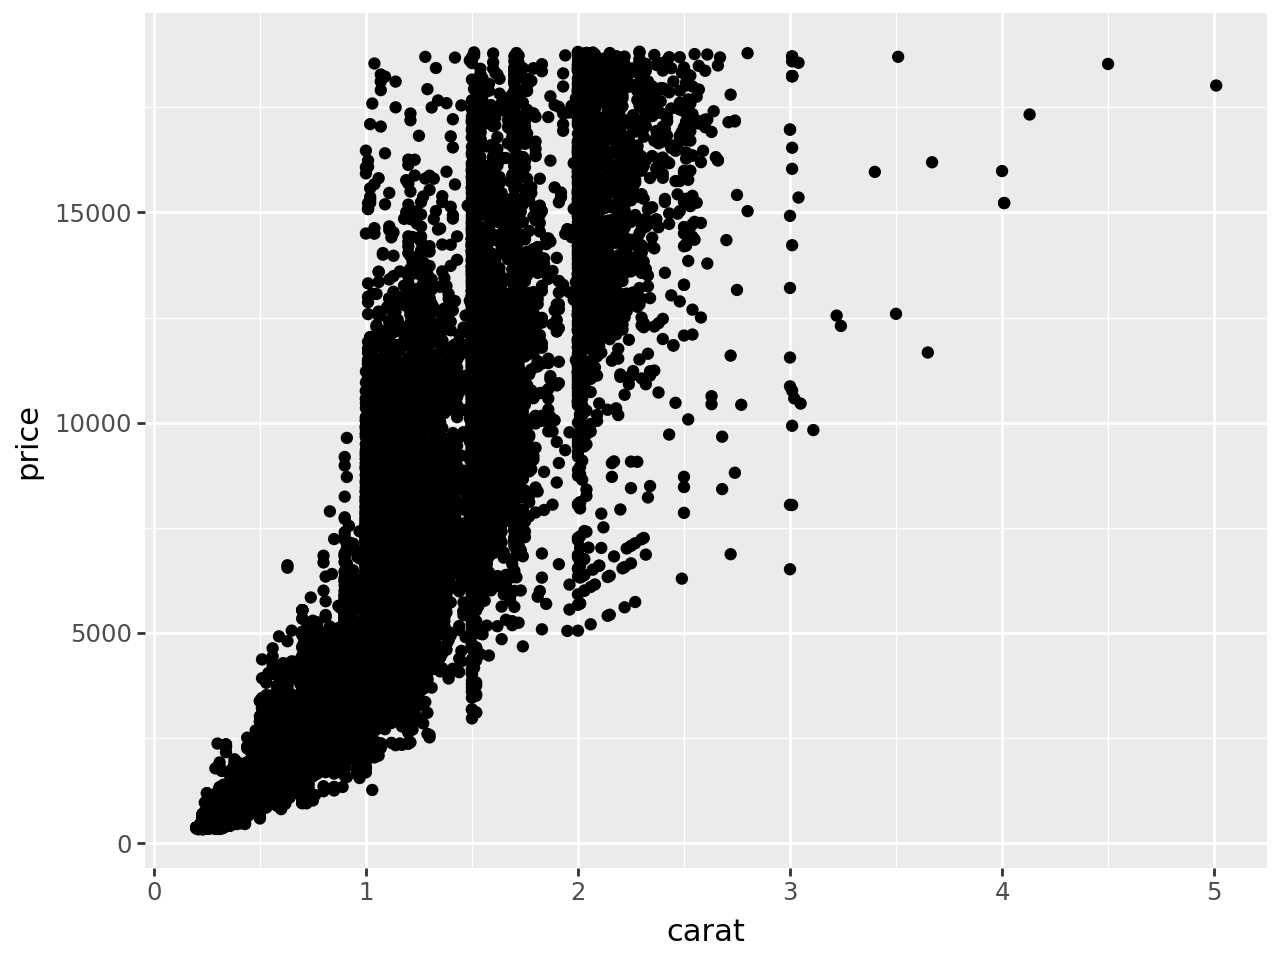

In [3]:
p = p + geom_point()
# Para visualizar el gráfico podemos simplemente poner su nombre
p
# También podríamos no hacer uso de variables intermedias
# ggplot(diamonds, aes(x = 'carat', y = 'price')) + geom_point()

### Ejercicio 1: Mapeando datos

Uno de los principios de la *gramática de gráficos* es que "los gráficos más utiles se optienen mediante un buen *mapeado estético*". Efectivamente, podemos añadir más información al gráfico realizando nuevos mapeados. Por ejemplo, podemos emplear los atributos estéticos *color* y *size*.

Modifica la gráfica anterior mapeando la variable *cut* a *color* y la variable *depth* a *size*.

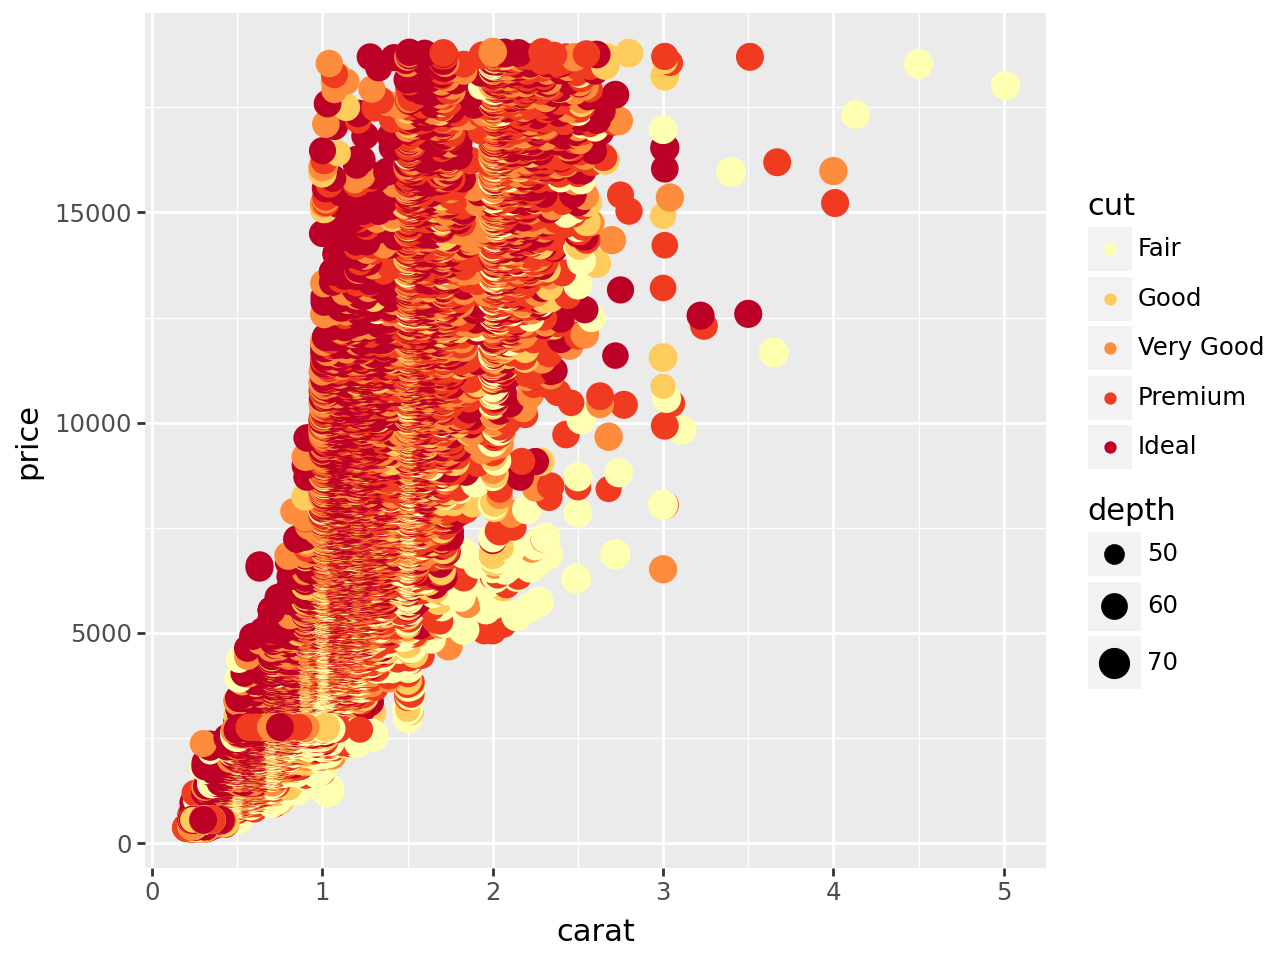

In [4]:
# Escribe la solución
p = ggplot(diamonds, aes(x="carat", y="price", color="cut", size="depth"))
p = p + geom_point()
p = p + scale_color_brewer(palette="YlOrRd")
p

Una vez completado el ejercicio, podemos ver que `ggplot` ha incorporado una leyenda para las variables de color y tamaño de forma automática. Por otra parte, esta gráfica es un claro ejemplo de gráfica en la que hemos incorporado demasiada información. El tamaño de los puntos no permite apreciar de forma efectiva cómo influye *depth* en  el precio de los diamantes, en gran parte debido a que muchos puntos se solapan. Vamos a intentar mejorar el dibujo en este sentido.

### Ejercicio 2: Atributos

Para mejorar el gráfico anterior vamos a modificar la forma de los puntos y su transparencia.

En los ejemplos anteriores cada elemento estético varía en función de la variable en la cuál había sido mapeado. Lo que pretendemos en este ejercicio es completamente distinto, ya que estableceremos el valor de una variable estética sin mapeo. Para diferenciar estas dos situaciones se habla de propiedades estéticas (*aesthetics*) y atributos (*attributes*). Para modificar el atributo *forma* podemos usar:

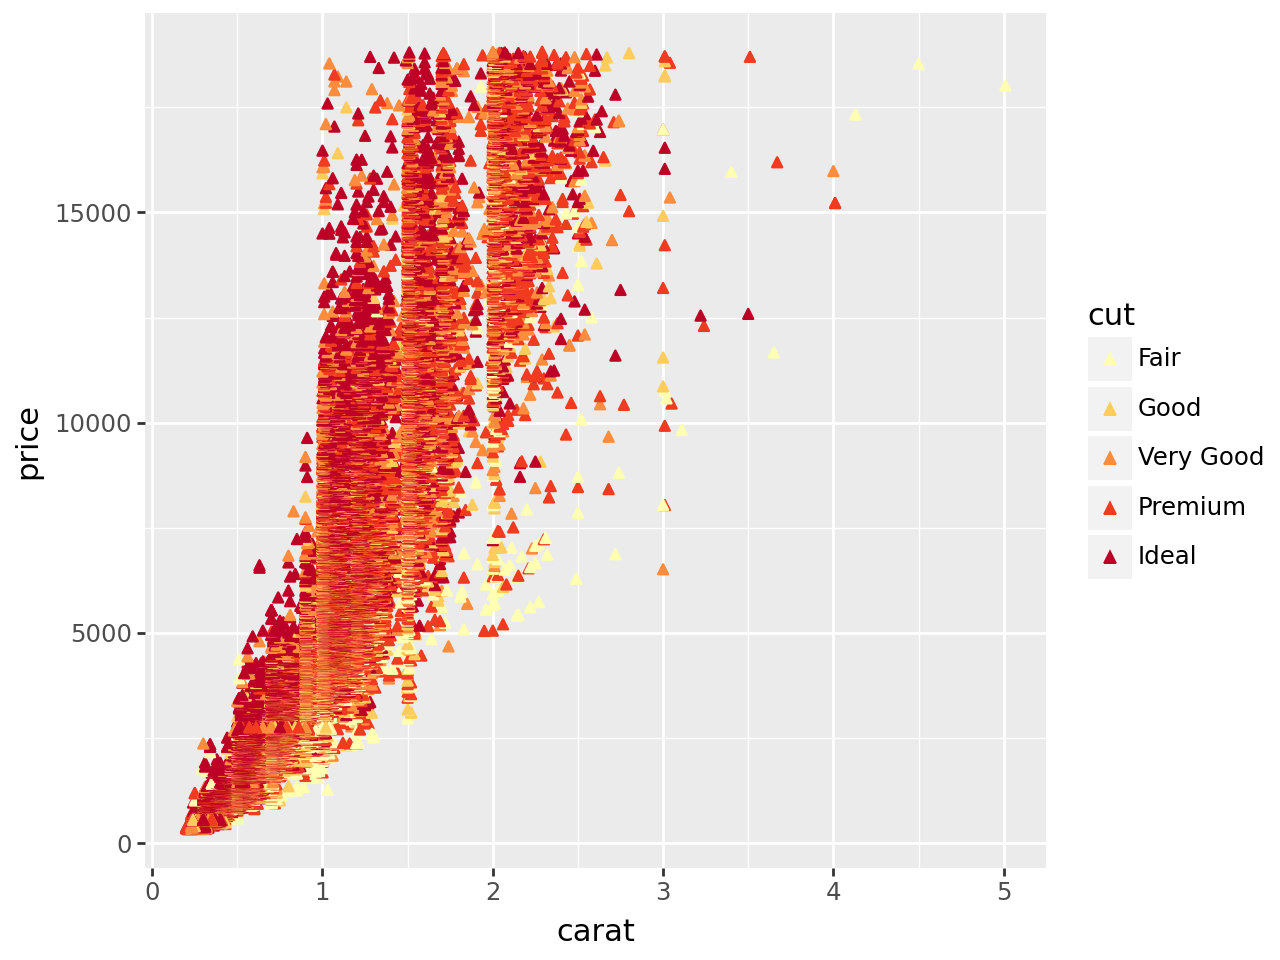

In [5]:
(
    ggplot(diamonds, aes(x='carat', y='price', color='cut'))
    + geom_point(shape='^')
    + scale_color_brewer(palette='YlOrRd')
)

Se puede apreciar que, en que en este caso, *shape* no está incluido dentro de la función *aes*. Como consecuencia, *shape* no ha sido incluida en la leyenda.

Modifica el *plot* anterior estableciendo el valor del atributo tamaño (*size*) a 1 y el valor de la transparencia (*alpha*) a 0.2. Es una buena práctica el uso de transparencia cuando hay solapamiento (*overplotting*).

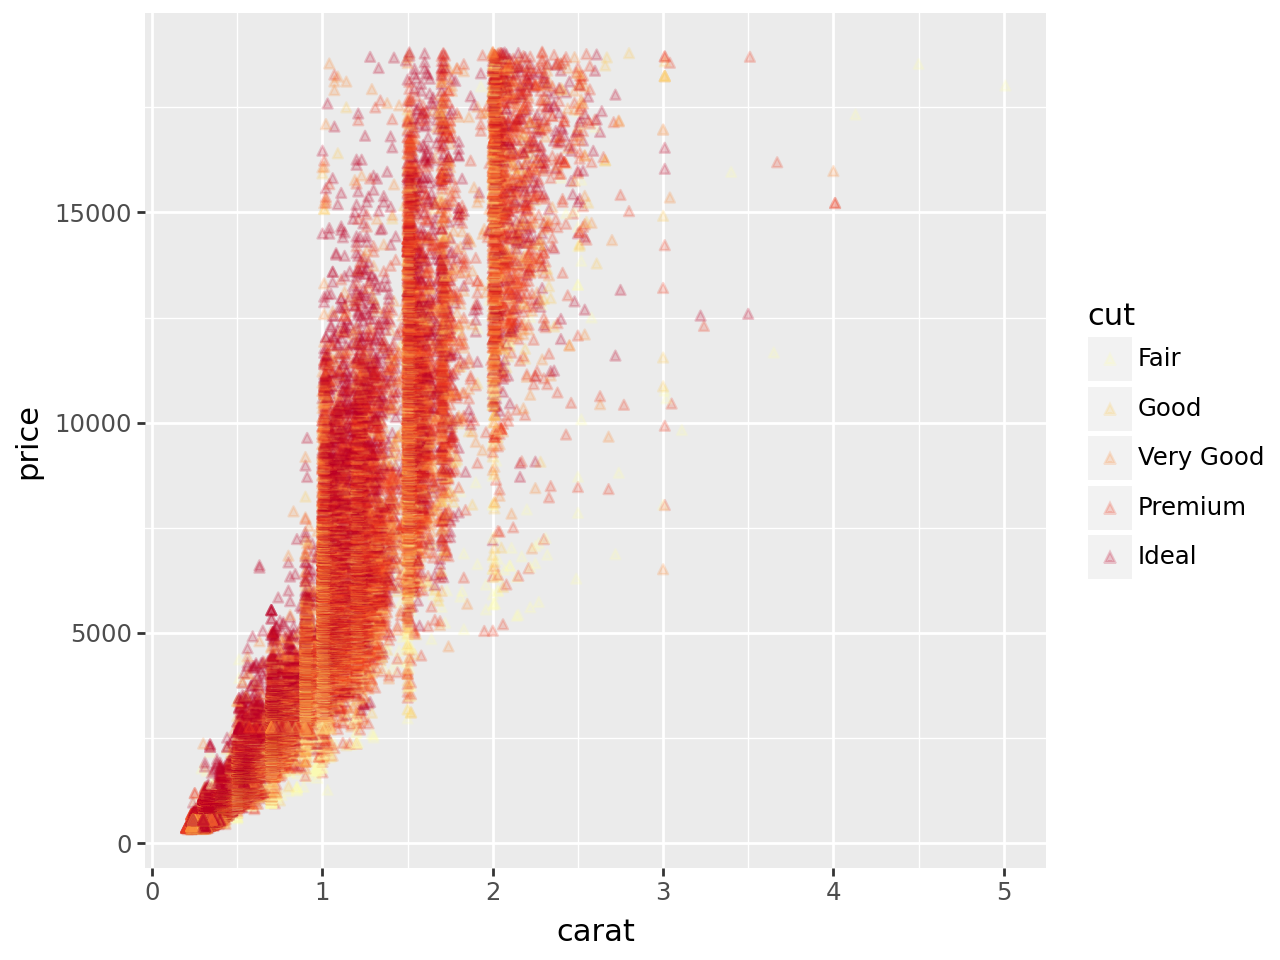

In [6]:
# Escribe la solución
(
    ggplot(diamonds, aes(x='carat', y='price', color='cut'))
    + geom_point(shape='^', alpha = 0.2)
    + scale_color_brewer(palette='YlOrRd')
)


### Ejercicio 3: Más geometrías

Para terminar con esta primera parte de la práctica vamos repasar los mapeos y a explorar nuevas geometrías mediante el `DataFrame` [meat](https://plotnine.org/reference/meat.html), que contiene datos acerca de la producción de diversos tipos de carne en Estados Unidos.

In [7]:
meat.head()

date   beef   veal    pork  lamb_and_mutton  broilers  other_chicken  \
0 1944-01-01  751.0   85.0  1280.0             89.0       NaN            NaN   
1 1944-02-01  713.0   77.0  1169.0             72.0       NaN            NaN   
2 1944-03-01  741.0   90.0  1128.0             75.0       NaN            NaN   
3 1944-04-01  650.0   89.0   978.0             66.0       NaN            NaN   
4 1944-05-01  681.0  106.0  1029.0             78.0       NaN            NaN   

   turkey  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

Crea un gráfico temporal para la producción de carne vacuna (*beef*) usando la geometría `geom_line`. Guarda el resultado en una variable auxiliar.

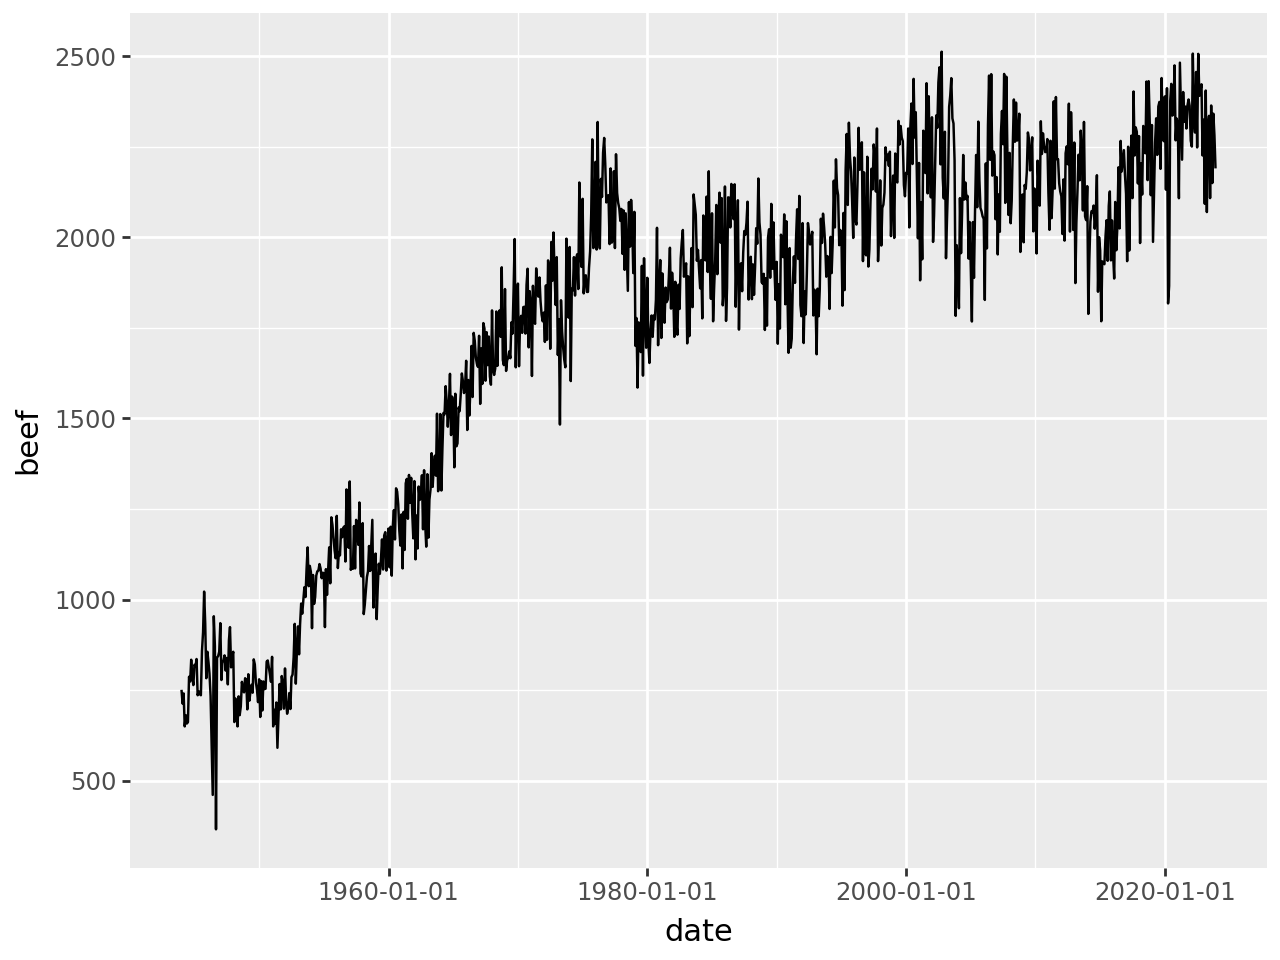

In [8]:
# Escribe la solución
(
    ggplot(meat, aes(x="date", y="beef"))
    + geom_line()
)


Es posible insertar varias capas con distintas geometrías o incluso estadísticos. Por ejemplo, usando la variable auxiliar creada en la celda anterior, añade a la serie temporal un diagrama de puntos de los datos (con `geom_point`) y una regresión (con `stat_smooth`).

Para poder utilizar la regresión local *loess* necesitaremos el paquete [scikit-misc](https://has2k1.github.io/scikit-misc/stable/):

```
conda install -c conda-forge scikit-misc
```

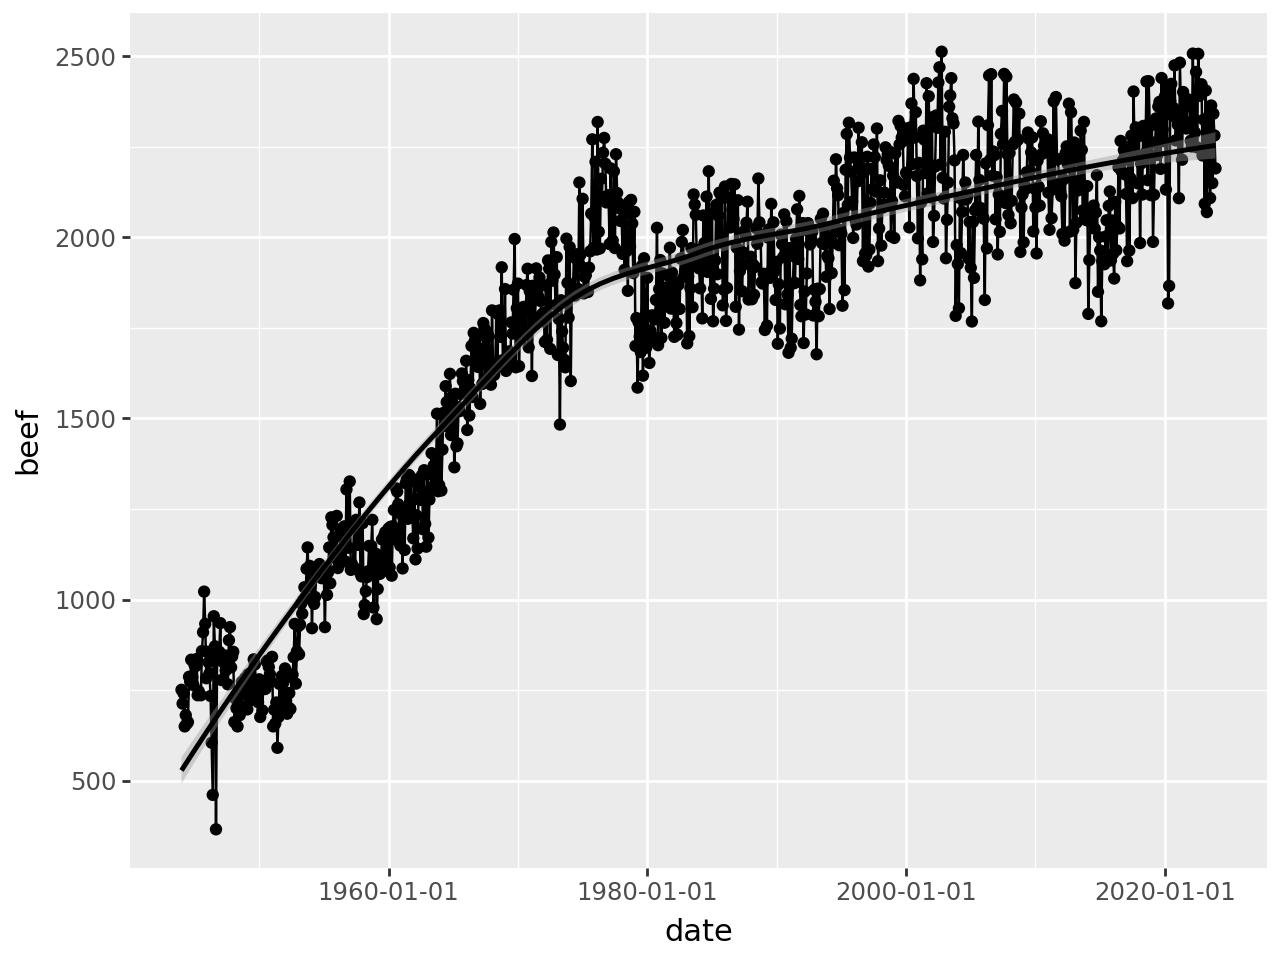

In [9]:
from skmisc.loess import loess

# Escribe la solución
(
    ggplot(meat, aes(x="date", y="beef"))
    + geom_line()
    + geom_point()
    + stat_smooth(method="loess")
)

Ahora cambia los atributos de color de la regresión (parámetro *color* con valor rojo) y grosor de la línea (parámetro *size* con valor 0.5). Recuerda que no debes usar la función *aes*, ya que en este caso no estamos trabajando con *aesthetics*, sino con *attributes*.

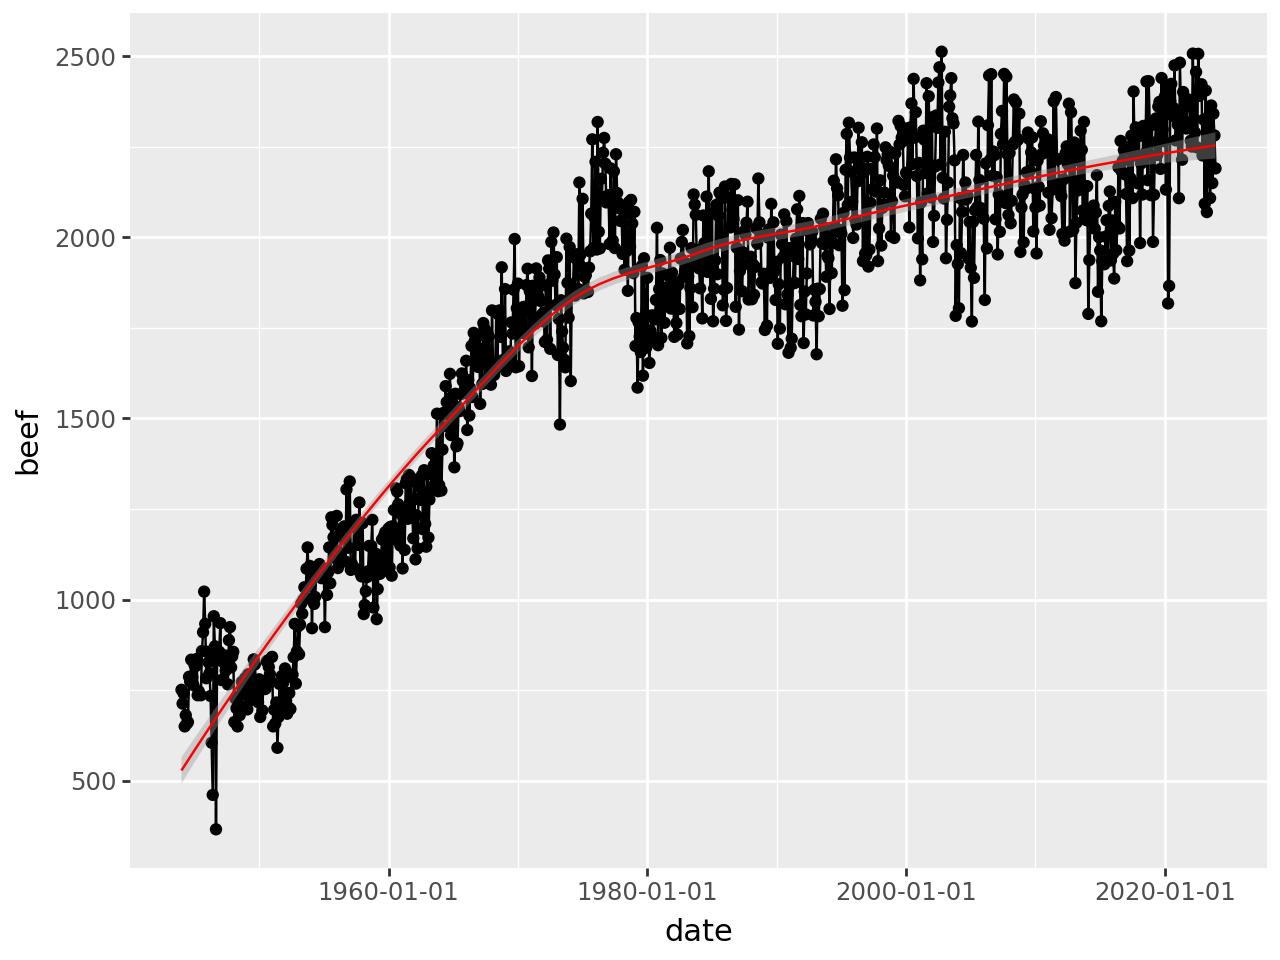

In [10]:
# Escribe la solución
(
    ggplot(meat, aes(x="date", y="beef"))
    + geom_line()
    + geom_point()
    + stat_smooth(method="loess", size=0.5, color="red")
)

### Ejercicio 4

Por defecto, `stat_smooth` usa [regresión local (o loess)](https://en.wikipedia.org/wiki/Local_regression) para obtener la regresión. La cantidad de puntos locales empleados en la regresión se puede controlar con el parámetro *span*.

Modifica el parámetro *span* y observa cómo afecta a la regresión. Elimina el intervalo de confianza a través del parámetro *se*.

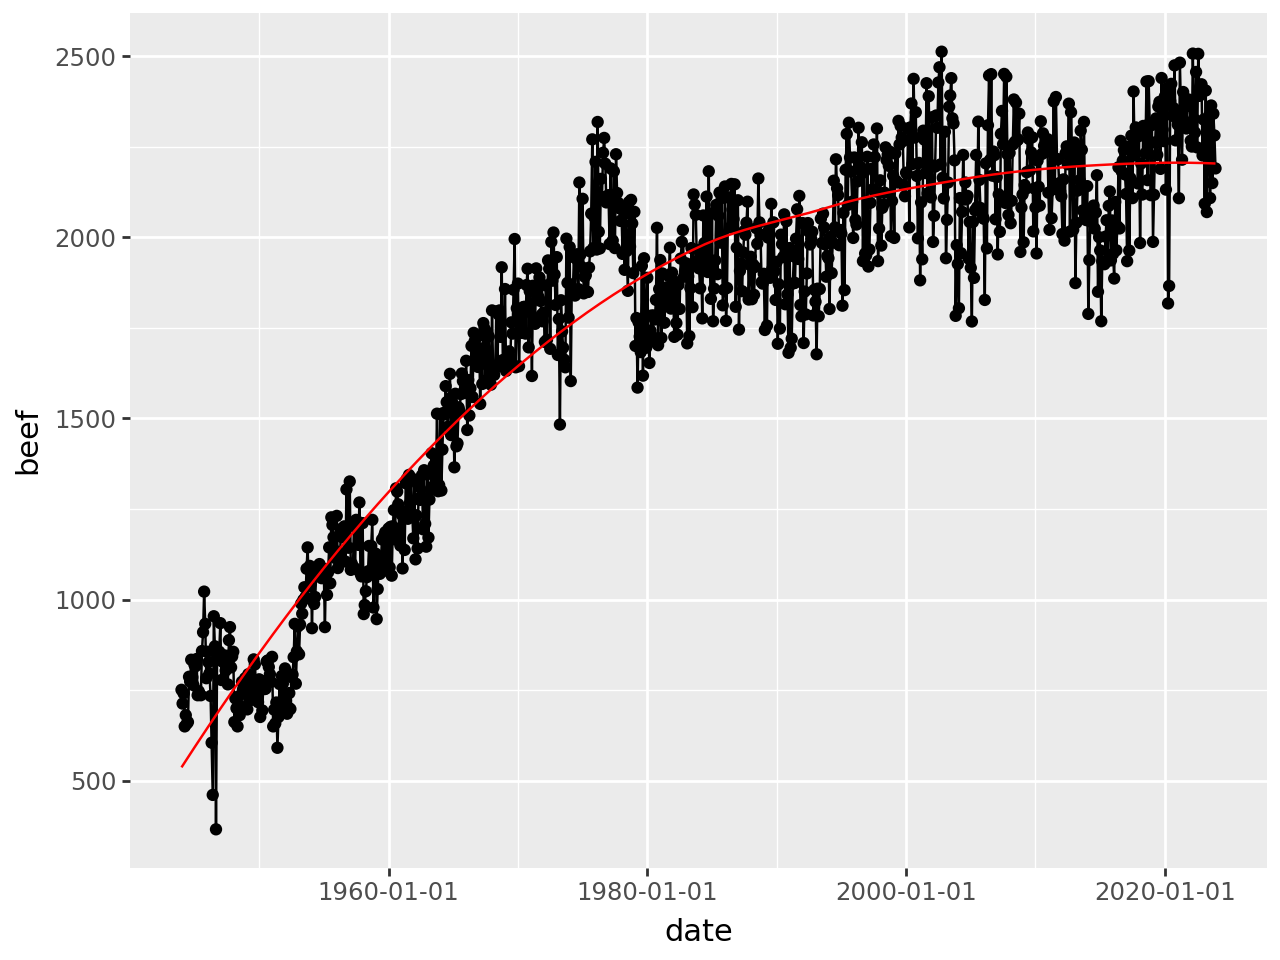

In [11]:
# Escribe la solución
(
    ggplot(meat, aes(x="date", y="beef"))
    + geom_line()
    + geom_point()
    + stat_smooth(method="loess", size=0.5, color="red", span=1, se=0)
)

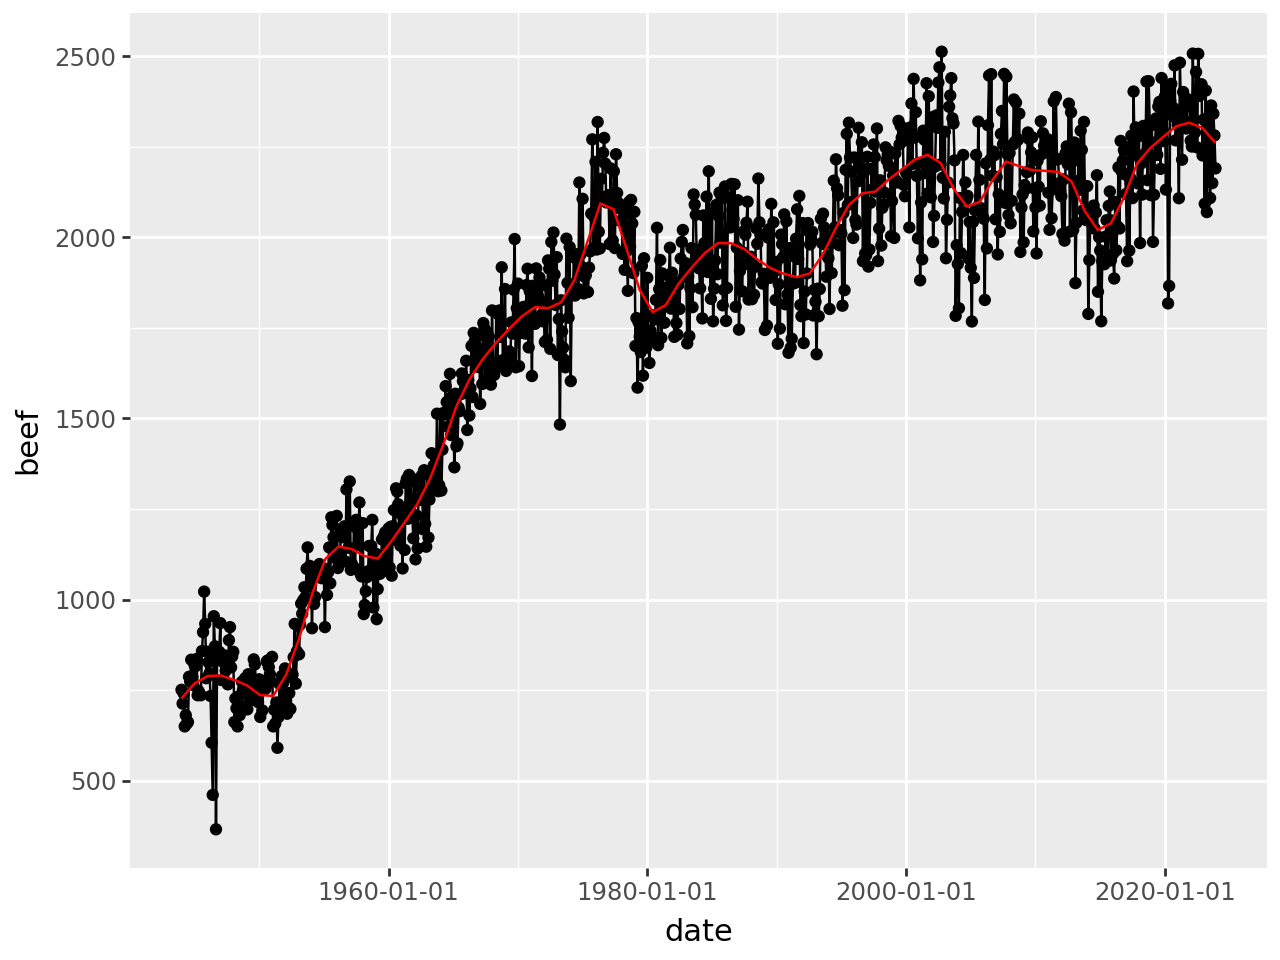

In [12]:
# Escribe la solución
(
    ggplot(meat, aes(x="date", y="beef"))
    + geom_line()
    + geom_point()
    + stat_smooth(method="loess", size=0.5, color="red", span=0.1, se=0)
)

## La capa de los datos

Imaginemos que deseamos dibujar el consumo de los distintos tipos de carne presentes en la tabla *meat* a lo largo del tiempo. Es muy posible que intuitivamente se nos ocurra explotar el hecho de que podemos sobreescribir los mapeos realizados anteriormente y superponer unas capas sobre otras para componer el gráfico:

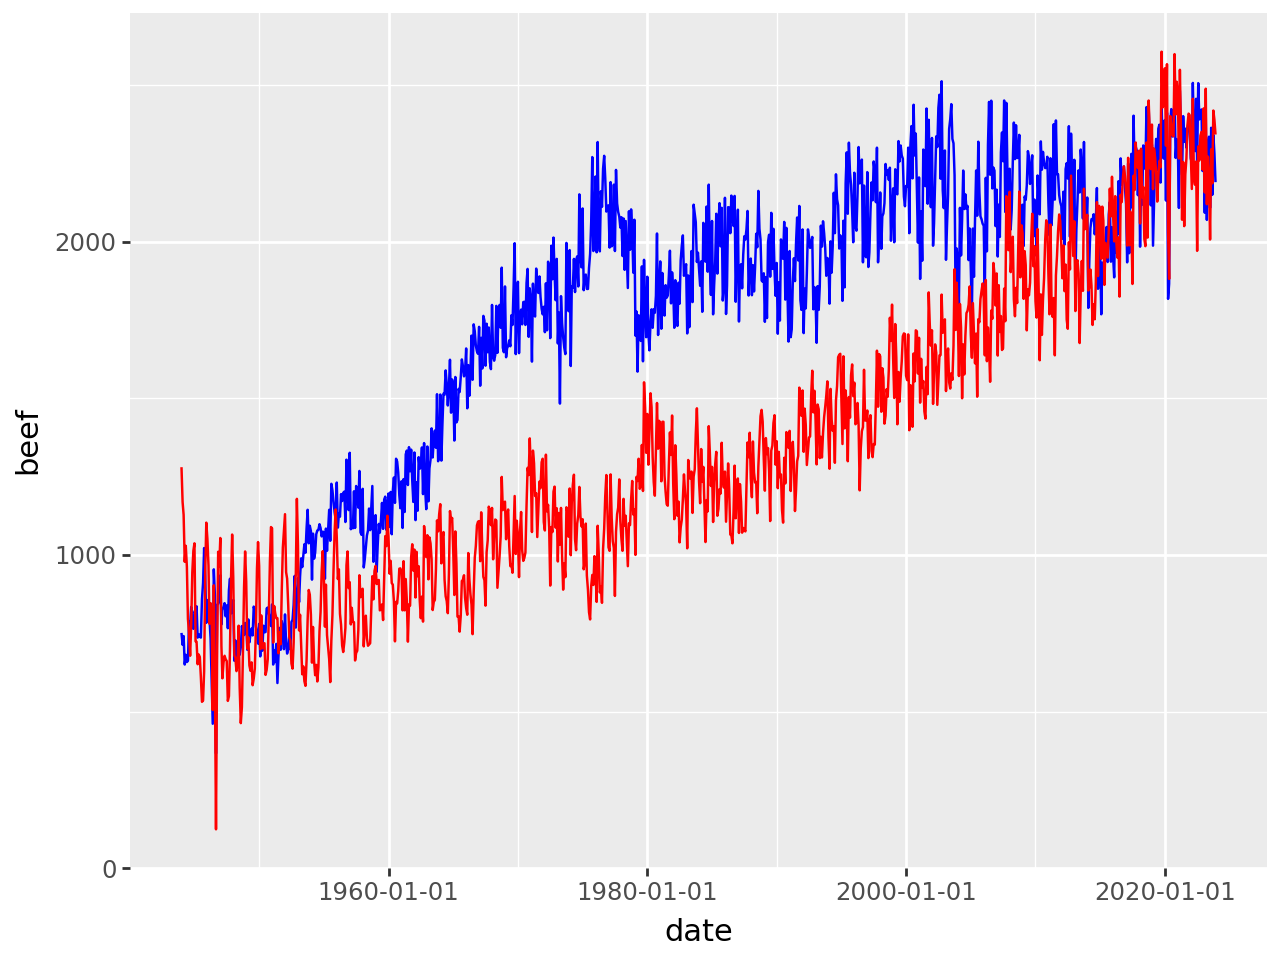

In [13]:
(
    ggplot(meat, aes(x='date', y='beef'))
    + geom_line(color='blue')
    + geom_line(aes(x='date', y = 'pork'), color = 'red')
)

Esta solución funciona pero, además de ser muy poco práctica porque aún tendríamos que añadir las capas correspondientes a los restantes tipos de carne, es una forma incorrecta de realizar el gráfico (al menos desde el punto de vista de la filosofía de la *gramática de gráficos*).

Las variables que hemos dibujado en el eje *y* han sido:

1. Consumo de carne de vaca.
2. Consumo de carne de cerdo.

Así pues lo que realmente queremos dibujar en el eje *y* es *consumo de carne*. Esto implica que **nuestra capa de datos no está en formato apropiado** para lo que deseamos representar y estudiar.

Este es un problema que suele presentarse a menudo estrechamente relacionado con dos formas de presentar los datos en formato tabular: [*wide* y *narrow*](https://en.wikipedia.org/wiki/Wide_and_narrow_data). En el caso que nos ocupa, un `DataFrame` más adecuado a nuestros intereses tendría el siguiente formato:

| date       | meat_type | consumption |
|------------|-----------|-------------|
| 1944-01-01 | beef      | 751         |
| 1944-02-01 | beef      | 713         |
| ...        | ...       | ...         |
| 1944-01-01 | veal      | 85          |
|...         | ...       | ...         |

Para pasar del formato *wide* al *narrow* podemos emplear la función [`melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) de pandas:

In [14]:
meat_narrow = meat.melt(id_vars='date', var_name='meat_type', value_name='production')
meat_narrow

date meat_type  production
0    1944-01-01      beef       751.0
1    1944-02-01      beef       713.0
2    1944-03-01      beef       741.0
3    1944-04-01      beef       650.0
4    1944-05-01      beef       681.0
...         ...       ...         ...
6715 2023-08-01    turkey       489.2
6716 2023-09-01    turkey       431.2
6717 2023-10-01    turkey       500.3
6718 2023-11-01    turkey       449.2
6719 2023-12-01    turkey       393.0

[6720 rows x 3 columns]

### Ejercicio 5

Usando la nueva tabla, crea un gráfico mostrando la producción de los distintos tipos de carne a lo largo del tiempo. Mapea cada tipo de carne con un color distinto.

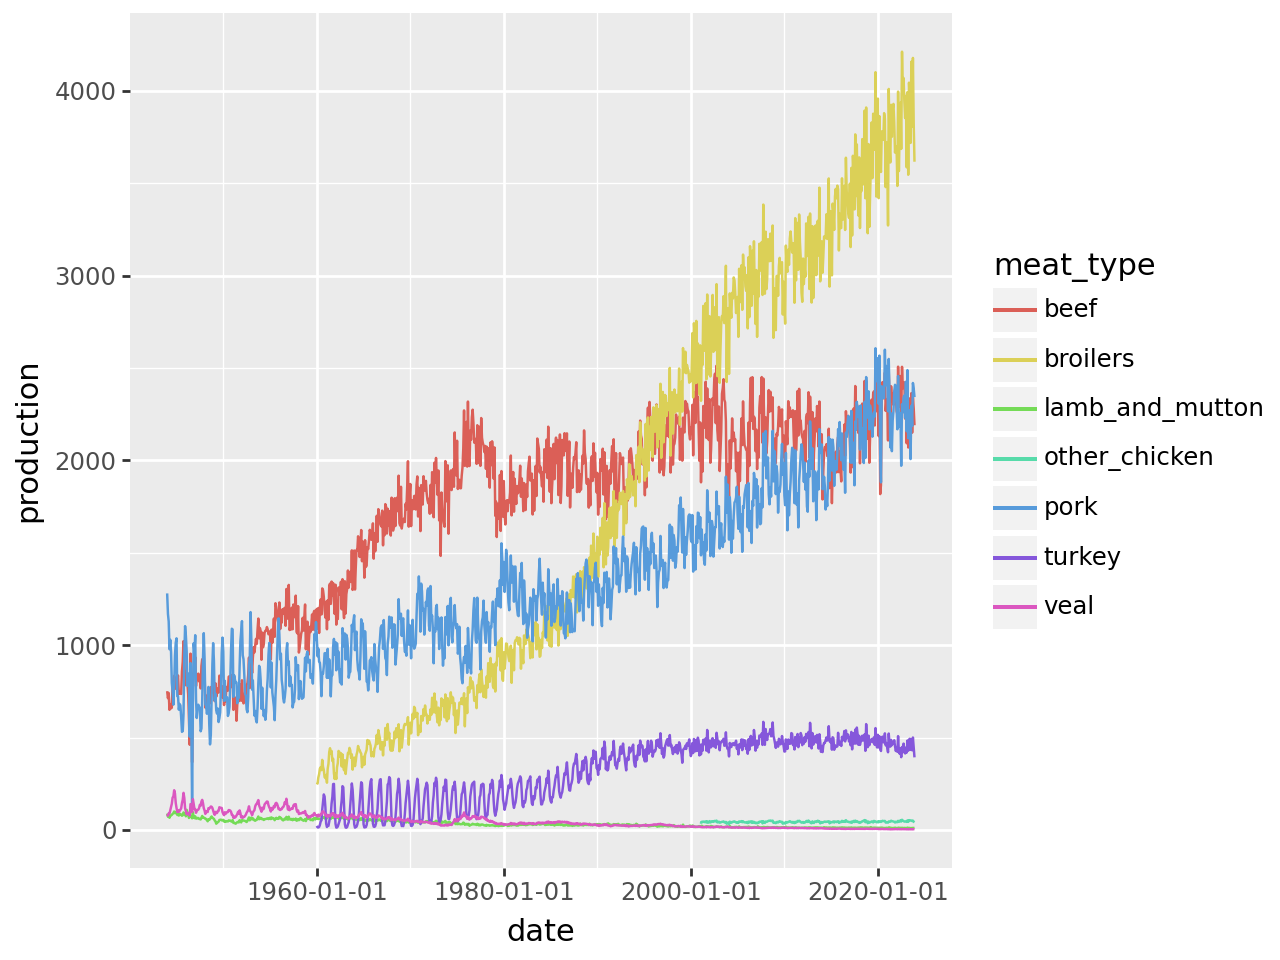

In [15]:
# Escribe la solución
(
    ggplot(meat_narrow, aes(x="date", y="production", color="meat_type"))
    + geom_line()
)

Una vez completes el ejercicio observa que, a diferencia de nuestro gráfico anterior, esta vez aparece una leyenda. Esta es una buena señal de que lo estamos haciendo bien.

Guarda el gráfico en una variable auxiliar y luego modifícala añadiendo `stat_smooth`. Observa que `ggplot` crea una regresión para cada tipo de carne. Elimina los intervalos de confianza del gráfico.

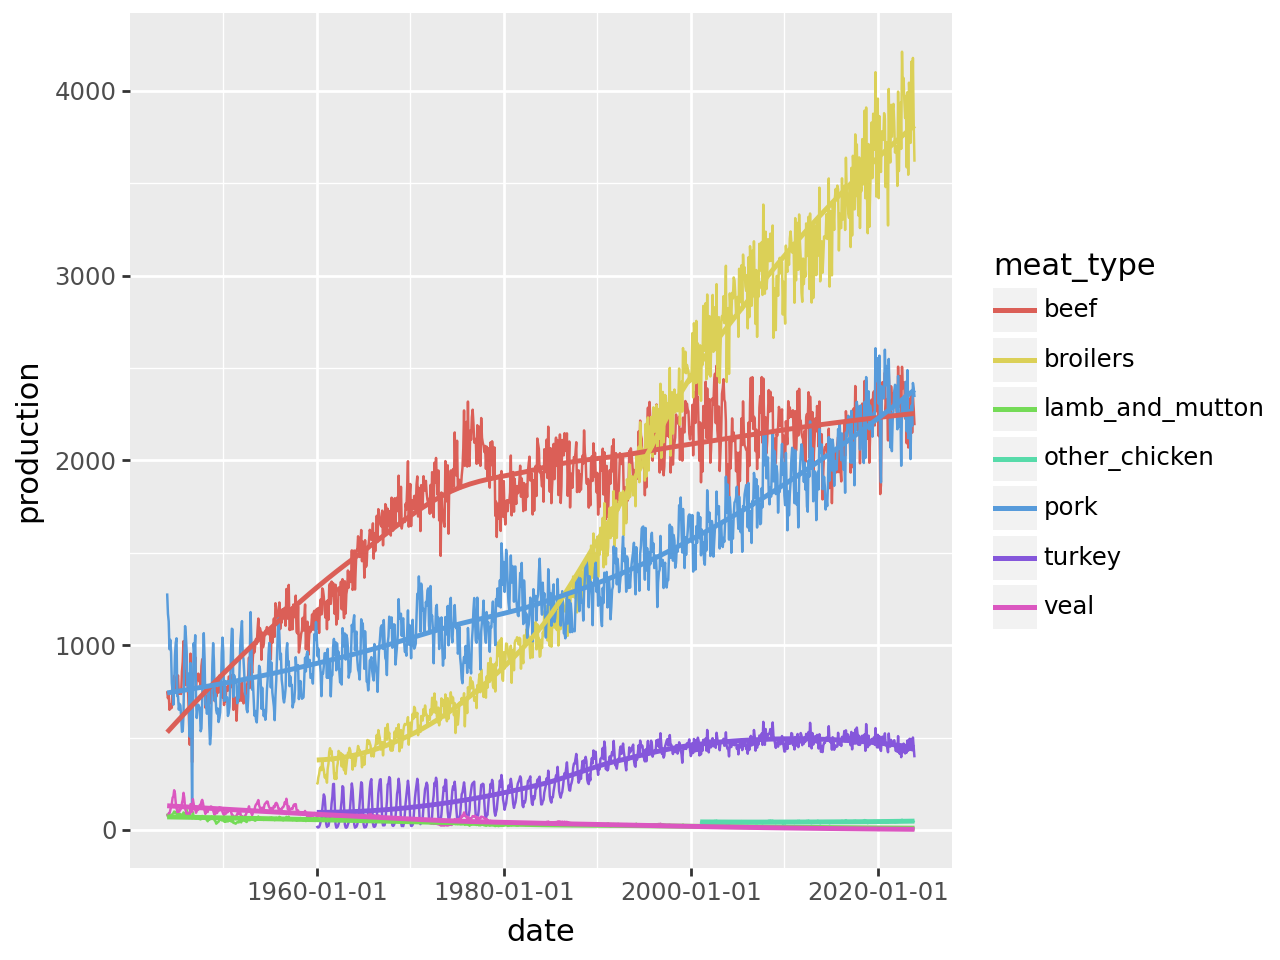

In [16]:
# Escribe la solución
(
    ggplot(meat_narrow, aes(x="date", y="production", color="meat_type"))
    + geom_line()
    + geom_smooth(se=0)
)

## Geometrías

Ya hemos trabajado un poco con distintas geometrías como `geom_point` o `geom_line`. En esta sección estudiaremos algunos problemas que pueden surgir con estas geometrías y exploraremos algunas nuevas.

### Diagramas de dispersión

Vamos a explorar el *dataset* `vocab`, que se os facilita en formato CSV. Este *dataset* continene información acerca de los años de educación recibidos y una puntuación (un número entero) en un test de vocabulario realizado con más de 21000 individuos en Estados Unidos durante el periodo 1972-2004. Importamos el *dataset* haciendo uso de la función de pandas `read_csv`:

In [17]:
vocab = pd.read_csv('ficheros/vocab.csv')
vocab.head()

year     sex  education  vocabulary
0  2004  Female          9           3
1  2004  Female         14           6
2  2004    Male         14           9
3  2004  Female         17           8
4  2004    Male         14           1

### Ejercicio 6

Dibuja un diagrama de dispersión de la puntuación en el test (*vocabulary*) en función del número de años de estudios (*education*). ¿Observas algún problema en la representación? Indica tu respuesta.

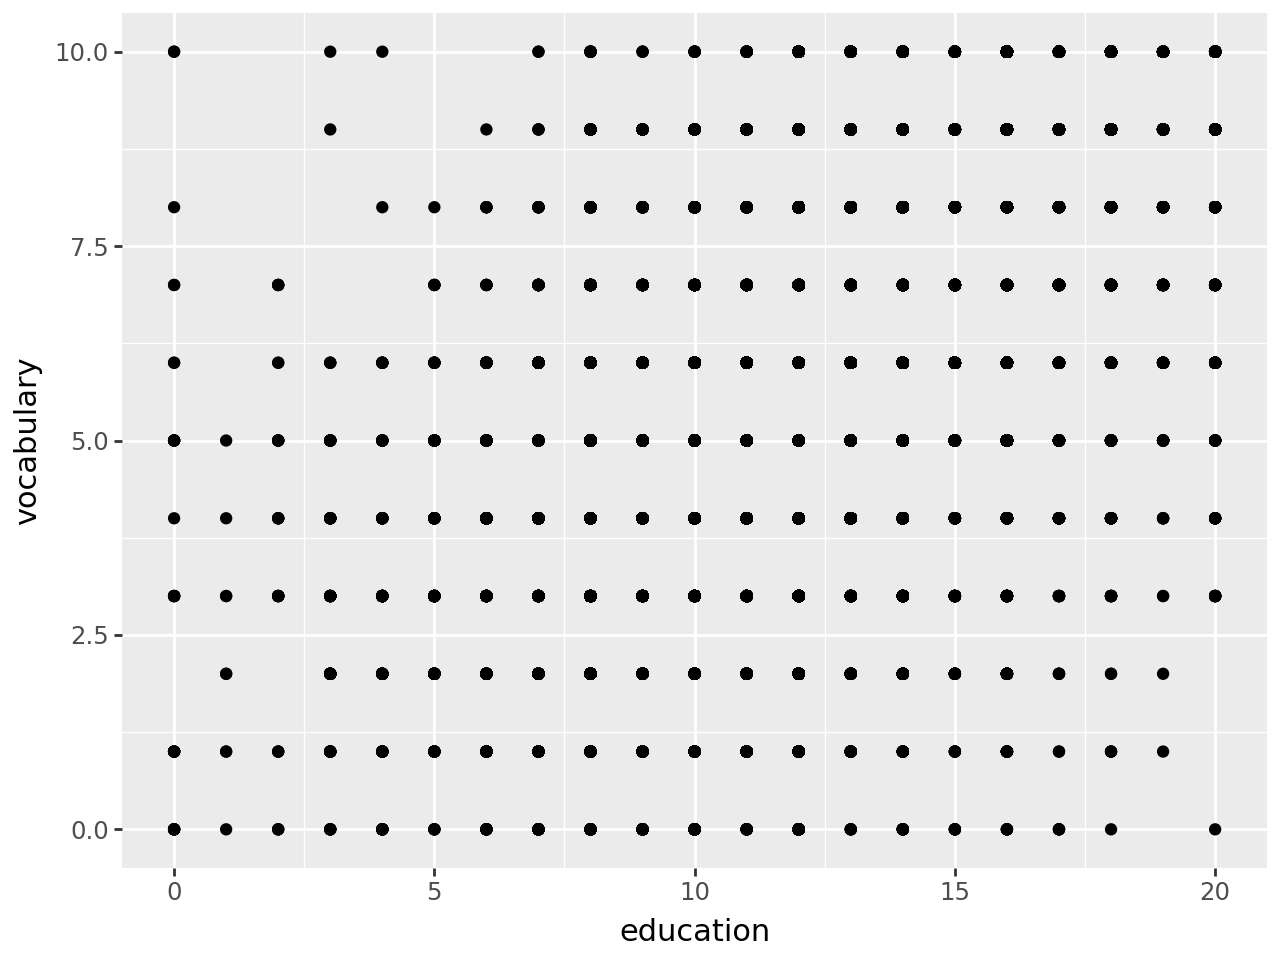

In [18]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education', y='vocabulary'))
    + geom_point()
)


Es obvio que tenemos un problema de *overplotting* debido a que las puntuaciones son números enteros. En este caso, no podemos solucionar el *overplotting* mediante el uso de transparencia. Lo que sí podemos hacer es intentar modificar levemente la posición de cada punto añadiendo un poco de ruido. A este procedimiento se le conoce como *jittering*.  Afortunadamente, al igual que podemos modificar el color o la forma de un punto, `ggplot` también nos permite modificar la posición de algunas geometrías mediante el atributo *position*.

### Ejercicio 7

Modifica el *plot* anterior añadiéndole *jittering*. Para ello establece el atributo `position='jitter'` dentro de `geom_point`. Al añadir *jittering* sí que tiene sentido aplicar transparencia, así que incluye un poco.

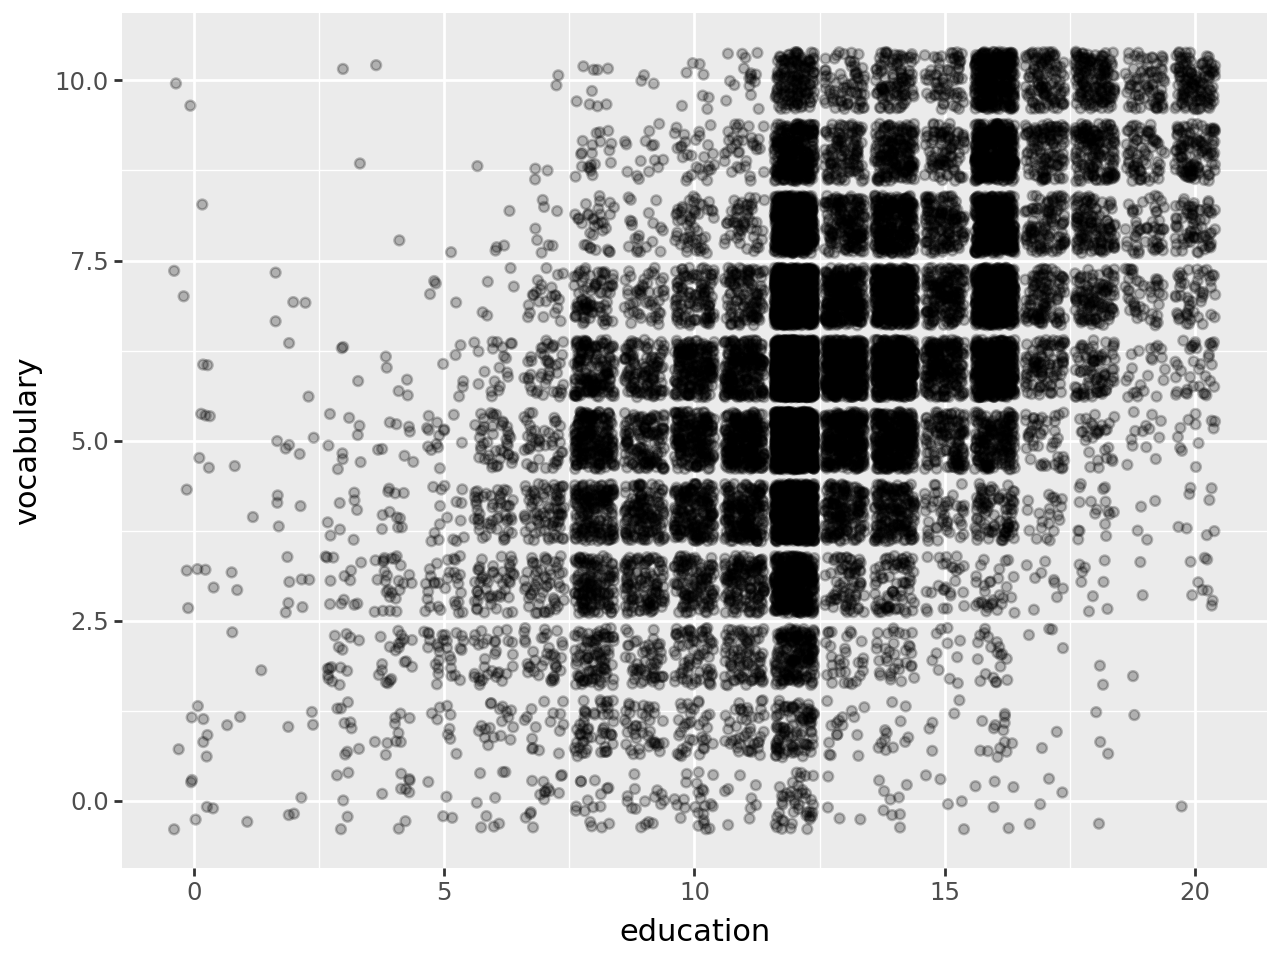

In [19]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education', y='vocabulary'))
    + geom_point(position="jitter", alpha=0.25)
)

Con el último *plot* podemos hacernos una idea de la posible relación existente entre *vocabulary* y *education*: parece que la puntuación obtenida en la prueba aumenta con los años de educación.

### Ejercicio 8

Confirma que los años de educación aumentan (en término medio) la puntuación de los estudiantes añadiendo una regresión a la gráfica anterior (`stat_smooth`). Usa el atributo *method* para  especificar que quieres hacer una regresión lineal (`'lm'`).

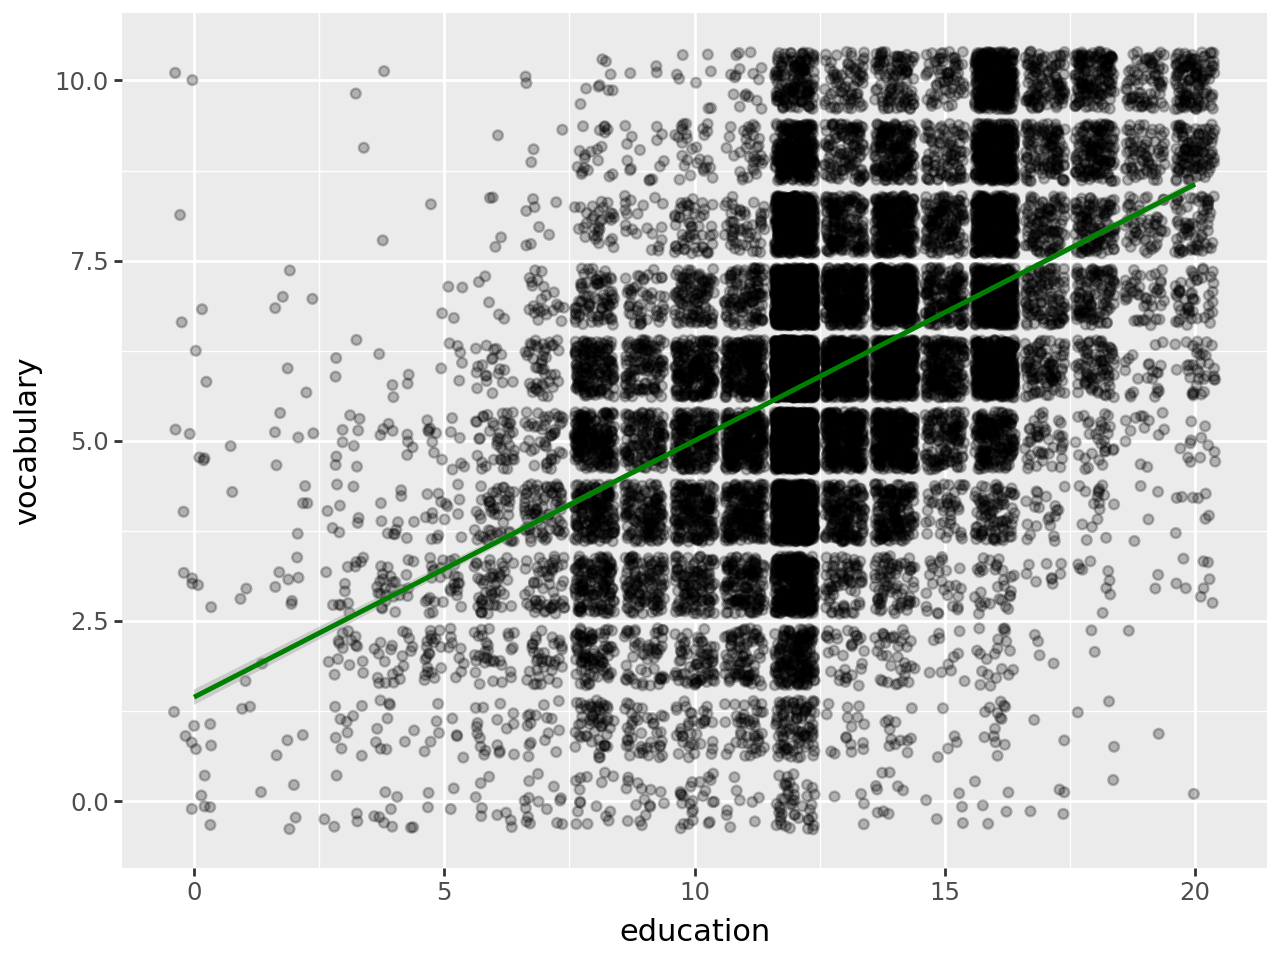

In [20]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education', y='vocabulary'))
    + geom_point(position="jitter", alpha=0.25)
    + geom_smooth(method="lm", color="green")
)

Como se aprecia en los ejemplos anteriores, una buena gráfica puede ser a menudo la mejor guía para sacar el máximo partido a los datos.

### Histogramas y gráficos de barras

El uso más habitual de la geometría tipo *barra* es la creación de histogramas. Dado que uno de los elementos gramaticales de `ggplot` son los estadísticos (es decir, que `ggplot` puede calcular los estadísticos más comunes por nosotros), realizar un histograma es muy sencillo. El único elemento estético a especificar es *x*: la variable a partir de la cual queremos construir el histograma. Por ejemplo, podemos crear un histograma para la variable *education* del siguiente modo:

c:\Users\X542UA\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 93'. Pick better value with 'binwidth'.


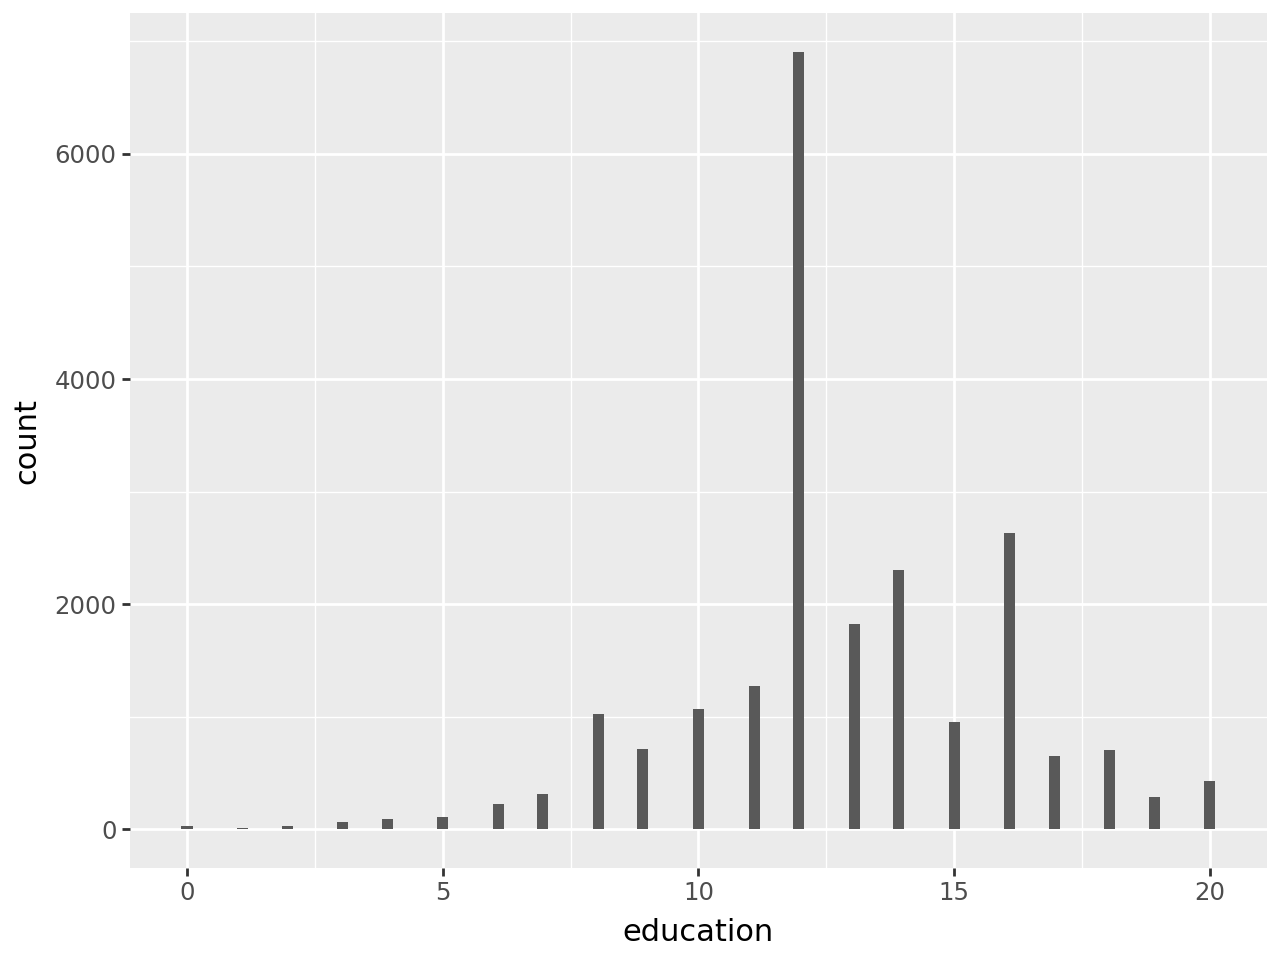

In [21]:
(
    ggplot(vocab, aes(x='education'))
    + geom_histogram()
)

### Ejercicio 9

El histograma anterior sugiere una distribución un tanto extraña. Averigua si realmente existen años de educación para los que no existen datos. Si no es así, ¿a qué pueden deberse los huecos del histograma? Recuerda que cualquier gráfica debe ir acompañada de un pensamiento crítico y reflexivo sobre lo que estamos viendo.

In [22]:
# Escribe la solución
print(vocab.isnull().sum())
print("Valores únicos de education:\n", np.unique(vocab.education.values))

year          0
sex           0
education     0
vocabulary    0
dtype: int64
Valores únicos de education:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


Los valores huecos se deben a que la variable education solo toma valores enteros. Por tanto, al hacer el histograma se han cogido tramos en los que no hay representaciones ya que no hay números enteros. En vez de cogerse por ejemplo (1, 2, 3, 4...), se ha cogido (1, 1.5, 2, 2.5, 3, ...).

### Ejercicio 10

Comprueba si se puede obtener un histograma mejor eligiendo otro tamaño para los contenedores. Tras observar los datos que queremos representar, ¿cuál crees que es una mejor elección para el atributo *binwidth* (o para *bins*)?

Como la separación entre los enteros de 1, el mejor binwidth sería 1.

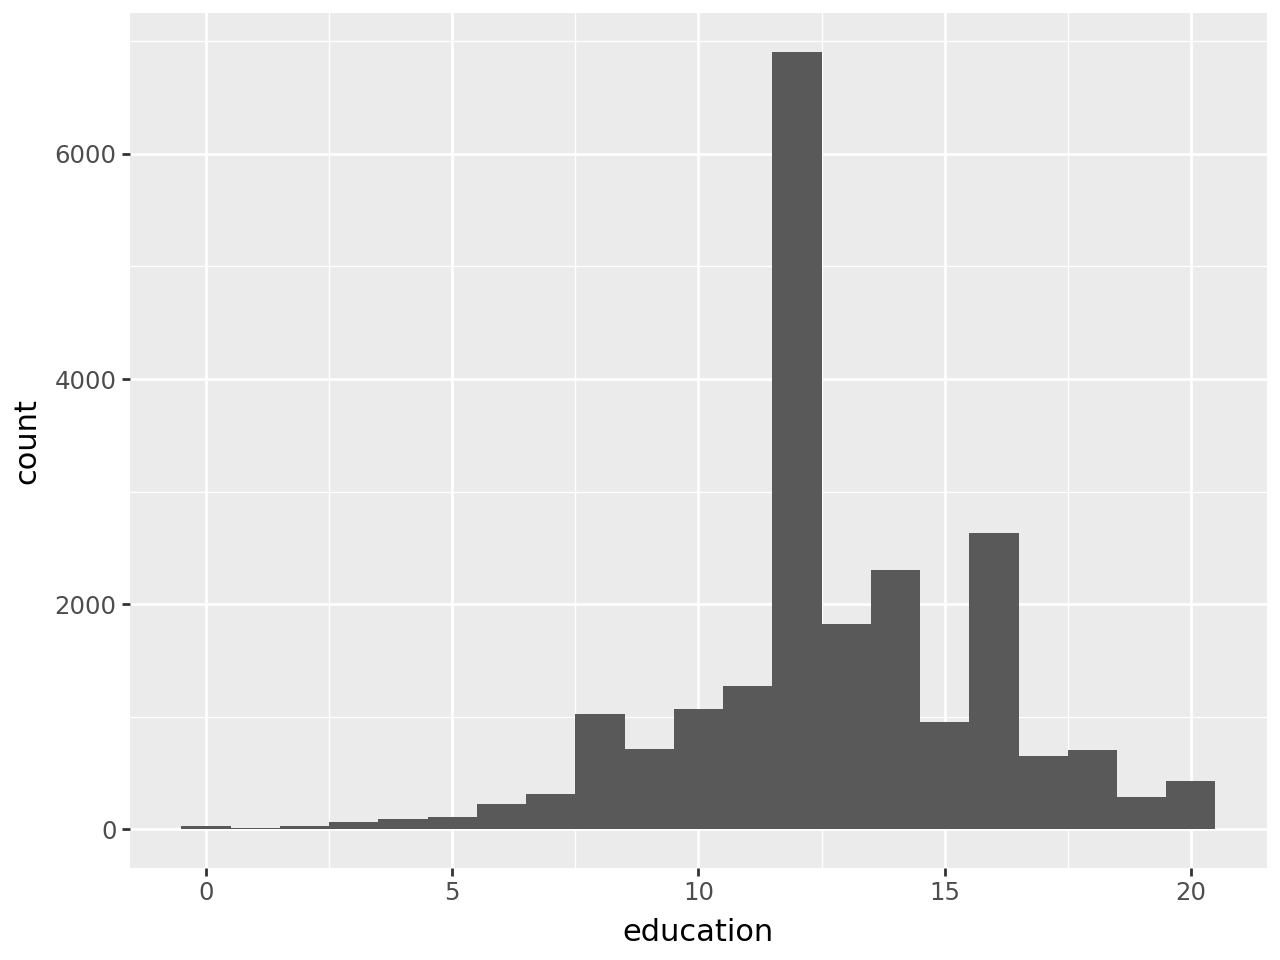

In [23]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education'))
    + geom_histogram(binwidth=1)
)

### Ejercicio 11

Crea una representación de la función de densidad especificando, como atributo estético para la *y*, *density* (ten en cuenta que se debe evaluar el *mapping* después de que se haya calculado el estadístico). En este caso se está pidiendo a `ggplot` que construya un nuevo *mapping* estético con los valores normalizados del histograma, y que emplee dicho atributo en la representación. Finalmente, compara el gráfico actual con el histograma que realizamos al principio de la sección. Indica tu respuesta.

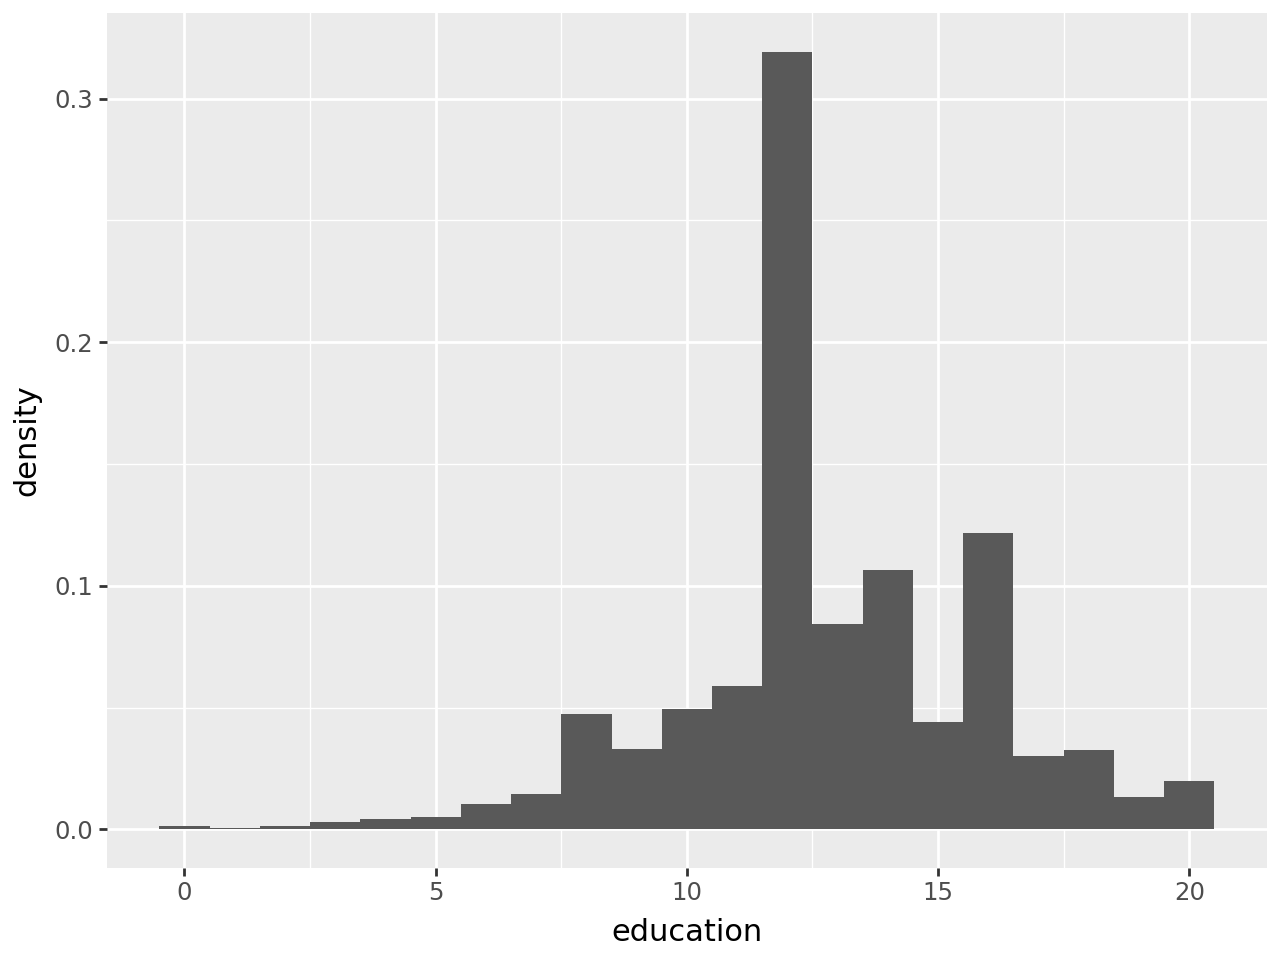

In [24]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education'))
    + geom_histogram(aes(y="..density.."), binwidth=1)
)

### Ejercicio 12

Volvamos al histograma original (con el *bindwidth* adecuado). Modifica el código para obtener dos histogramas coloreados por sexo (utiliza el atributo *fill*). ¿Existe algún problema perceptual en el gráfico? Indica tu respuesta.

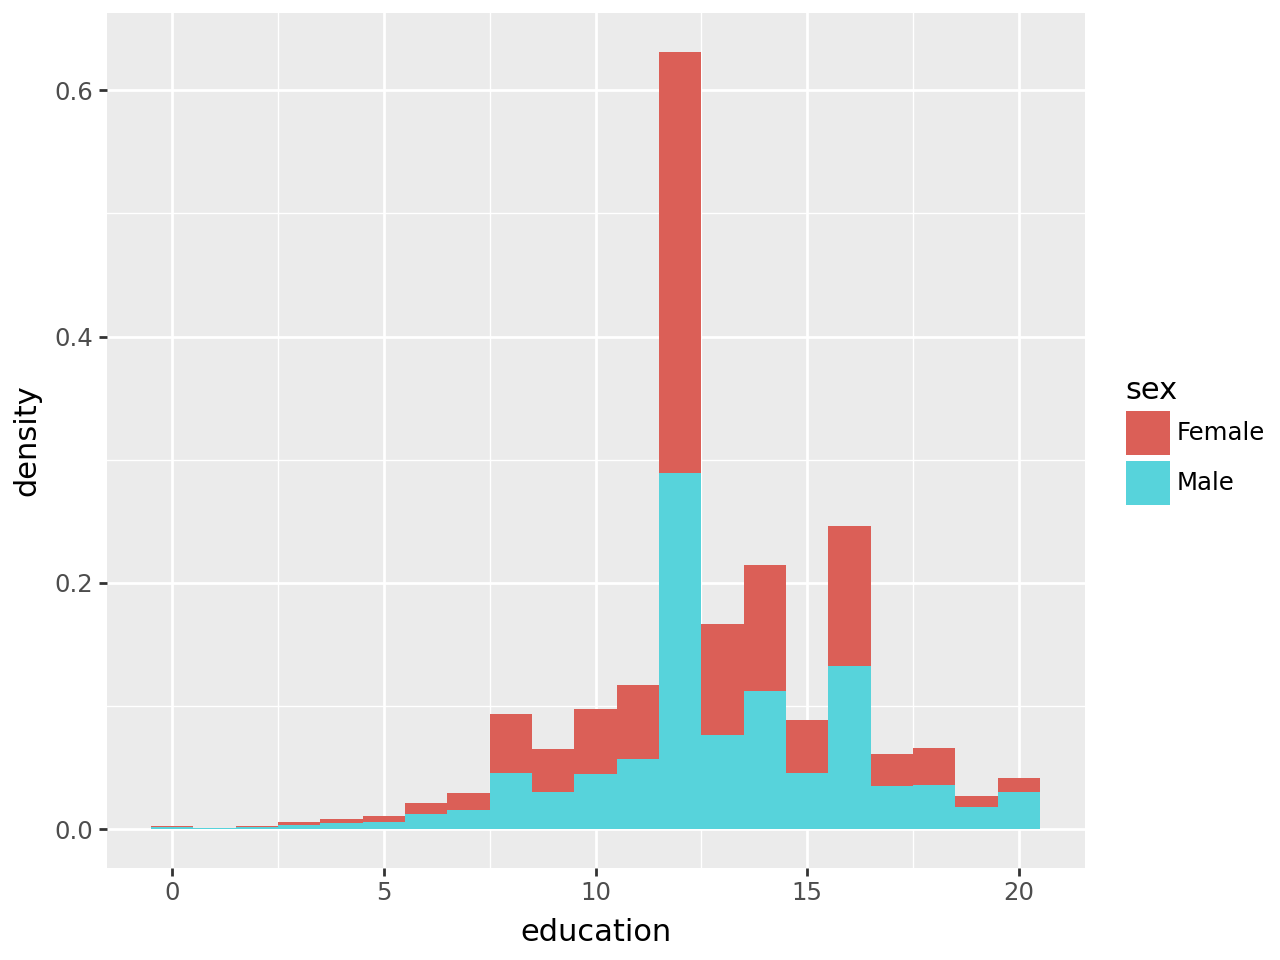

In [25]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education', fill="sex"))
    + geom_histogram(aes(y="..density.."), binwidth=1)
)

Evidentemente, deberíamos evitar cualquier ambigüedad en nuestros gráficos. Afortunadamente, existen modificadores de posición para los gráficos de barras (recuerda el modificador `'jitter'` que fue usado con `geom_point`). Prueba las distintas opciones para *position* y usa la más adecuada para representar los dos histogramas (las posibles opciones son `'identity'`, `'jitter'`, `'dodge'`, `'stack'` y `'fill'`).

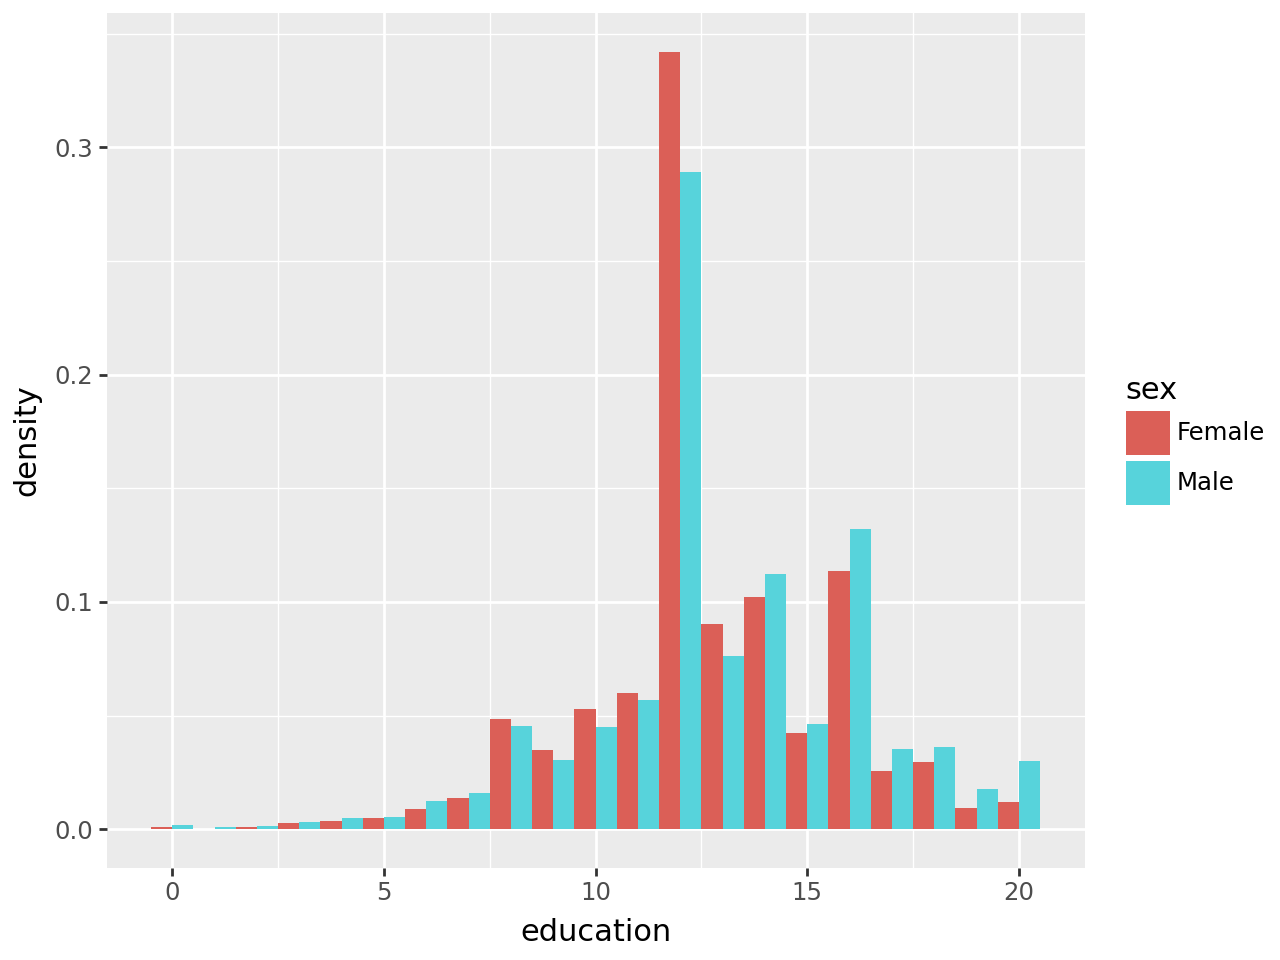

In [26]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education', fill="sex"))
    + geom_histogram(aes(y="..density.."), position="dodge", binwidth=1)
)

## *Facetas*

Imaginemos que queremos separar un conjunto de datos por una o varias variables nominales (las *facetas*) y representar los subconjuntos resultantes en gráficos adyacentes. Para realizar este tipo de gráficos `ggplot` ofrece las funciones `facet_grid` y `facet_wrap`. La función `facet_wrap` acepta como argumento el nombre de la variable por la cual queremos separar el *dataset*, mientras que `facet_grid` permite especificar dos variables. En esta práctica nos centraremos en `facet_wrap`.

Anteriormente hemos representado el precio de los diamantes frente al número de quilates, distinguiendo mediante el color distintos tipos de corte. Podemos realizar una gráfica del precio *versus* los quilates separando por el tipo de corte. En este caso, como solo tenemos una variable, emplearemos la función `facet_wrap`:

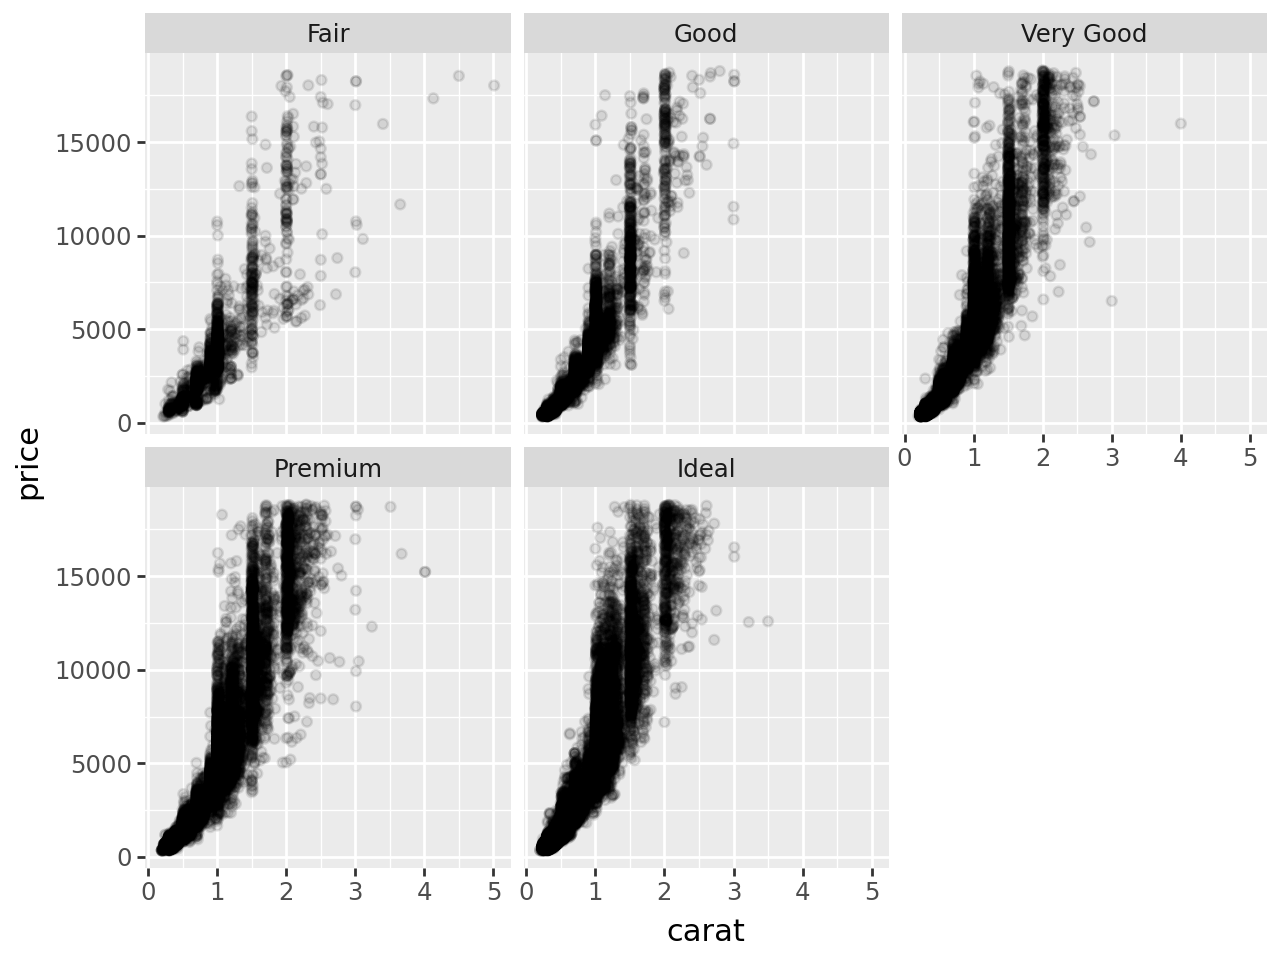

In [27]:
(ggplot(diamonds, aes(x='carat', y='price'))
 + geom_point(alpha=0.1)
 + facet_wrap('cut')
)

### Ejercicio 13

Usando el *dataset* `meat`, representa la producción de carne a lo largo del tiempo, separando el *dataset* original por tipo de carne (piensa qué formato debes emplear, *narrow* o *wide*). Añade a cada subgráfico una regresión loess sin intervalo de confianza.

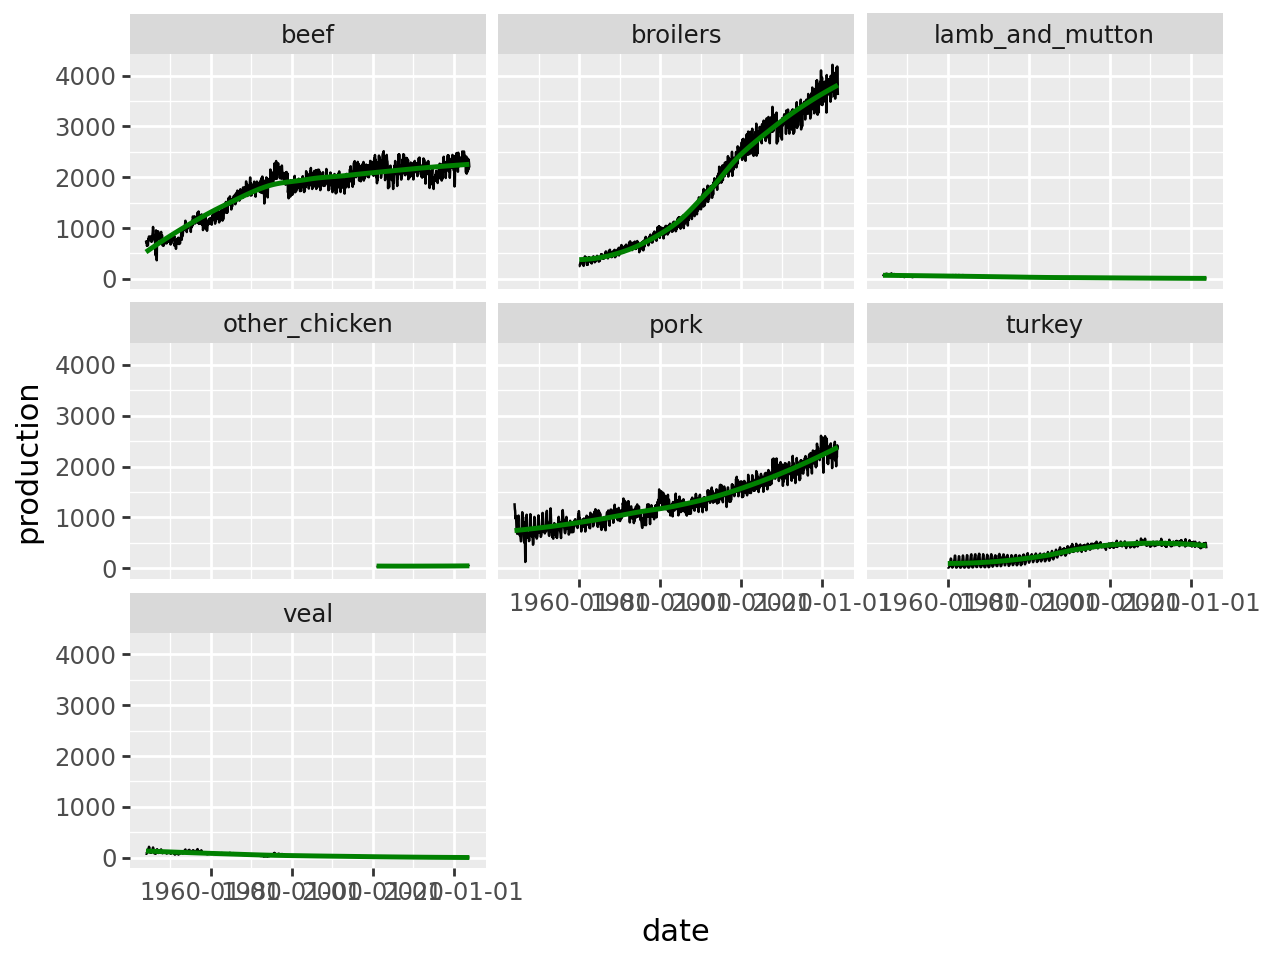

In [28]:
# Escribe la solución
(
    ggplot(meat_narrow, aes(x="date", y="production"))
    + geom_line()
    + geom_smooth(method="loess", color="green", se=0)
    + facet_wrap("meat_type")
)

Por defecto, `facet_wrap` usa la misma escala para los ejes x e y. Mejora el gráfico anterior usando el atributo *scales*. El atributo *scales* acepta los valores `'fixed'`, `'free'`, `'free_x'` y `'free_y'`. ¿Qué efecto tiene cada uno de ellos? Indica tu respuesta.

El atributo free hace que los ejes que indica se adapten a cada gráfica individual. 

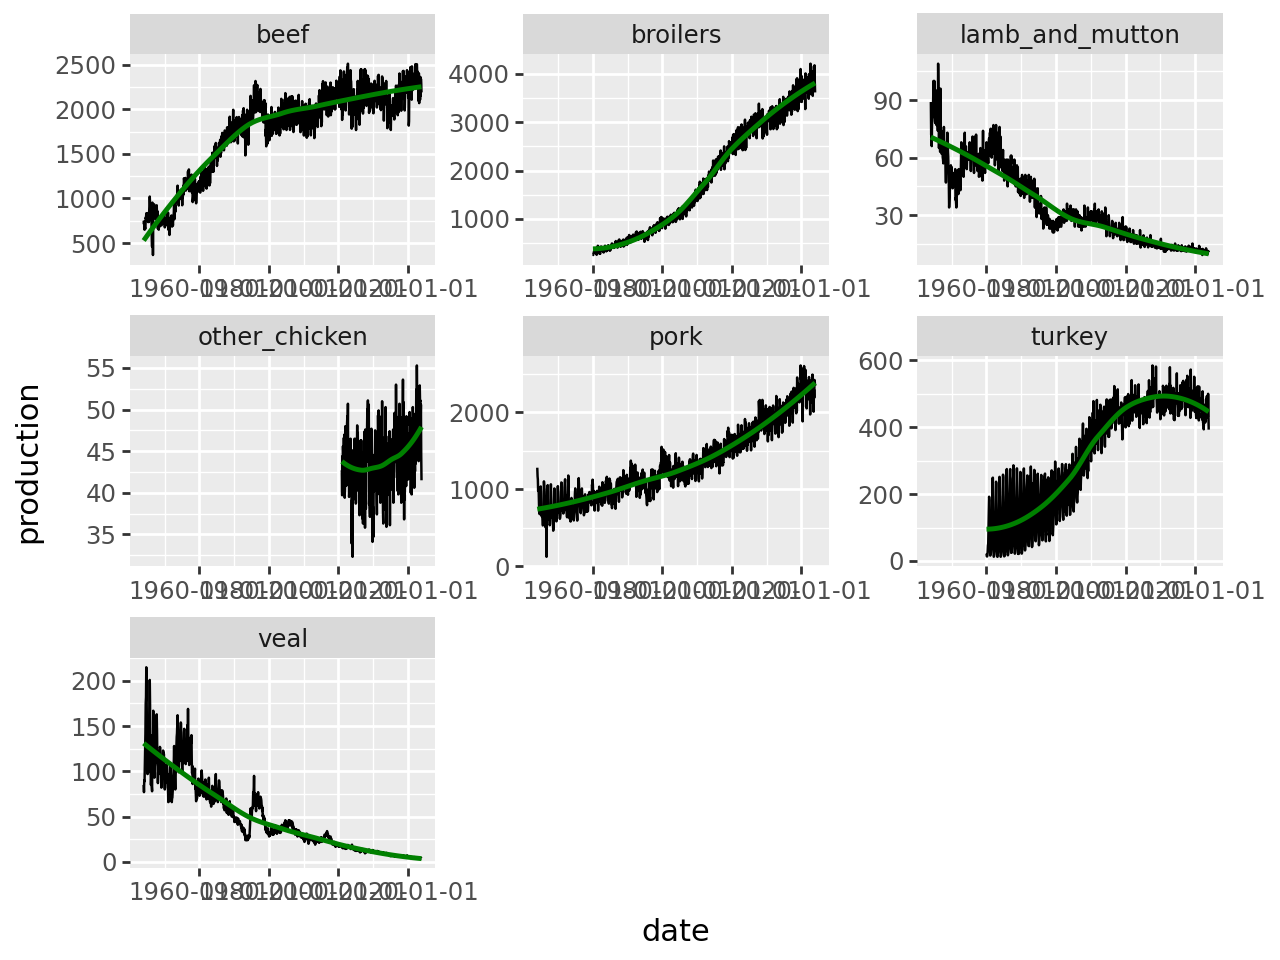

In [48]:
# Escribe la solución
(
    ggplot(meat_narrow, aes(x="date", y="production"))
    + geom_line()
    + geom_smooth(method="loess", color="green", se=0)
    + facet_wrap("meat_type", scales="free")
)

## Estadísticos

`ggplot` incorpora también una capa estadística con la que es sencillo añadir representaciones de los estadísticos más comunes a nuestros gráficos. Nosotros ya hemos usado esta capa de forma implícita cuando usamos geometrías que implican cálculos estadísticos, como `geom_histogram`, `geom_smooth` o `geom_density`. Estas geometrías hacen uso de las funciones estadísticas `stat_histogram`, `stat_smooth` y `stat_density` respectivamente (todas las funciones de la capa estadística comienzan por `stat_`). De hecho, estas dos llamadas que se muestran a continuación serían idénticas:

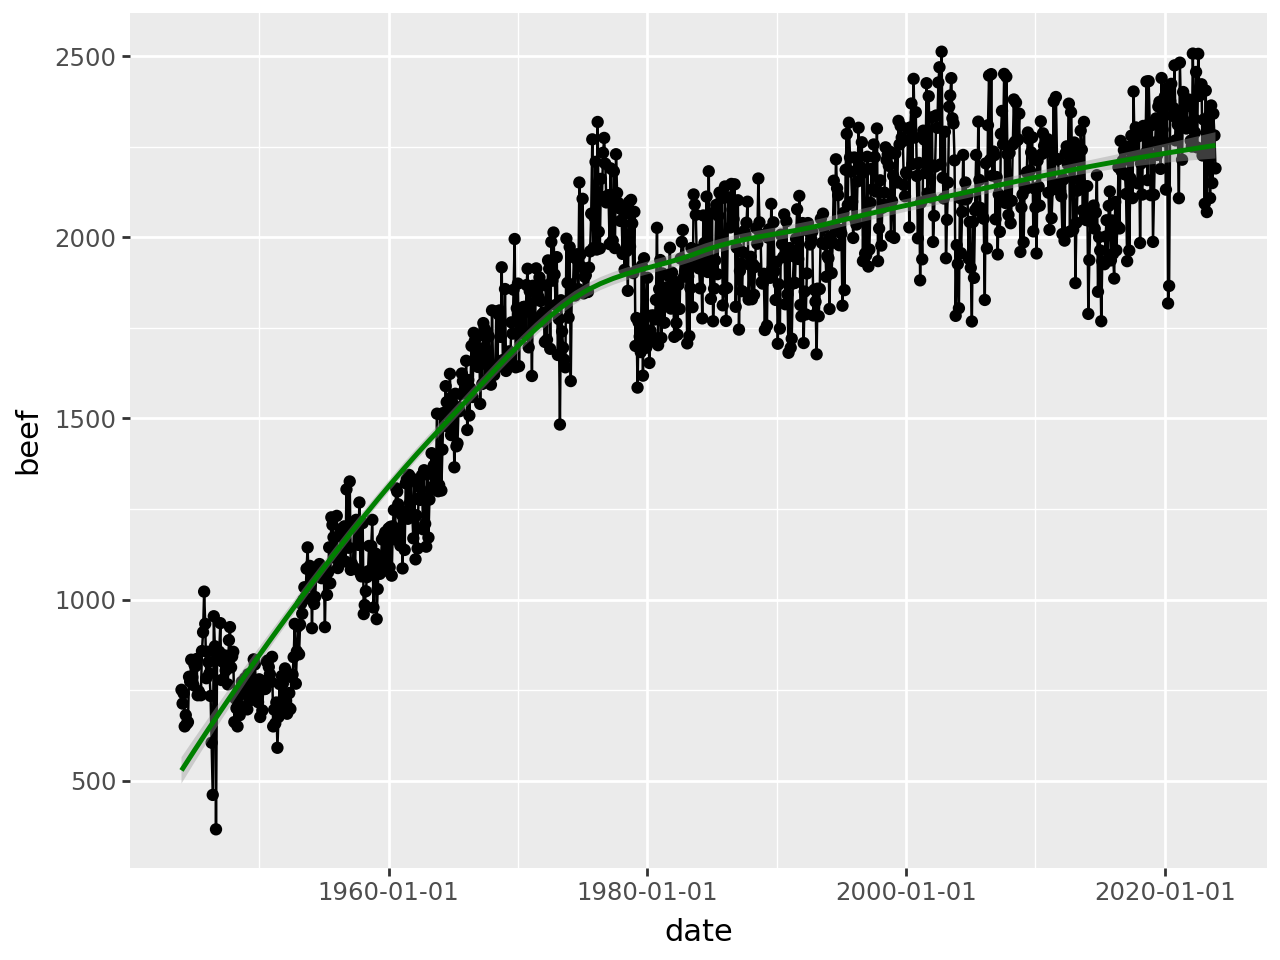

In [30]:
p = ggplot(meat, aes(x='date', y = 'beef')) + geom_line() + geom_point()
p + geom_smooth(color='green')

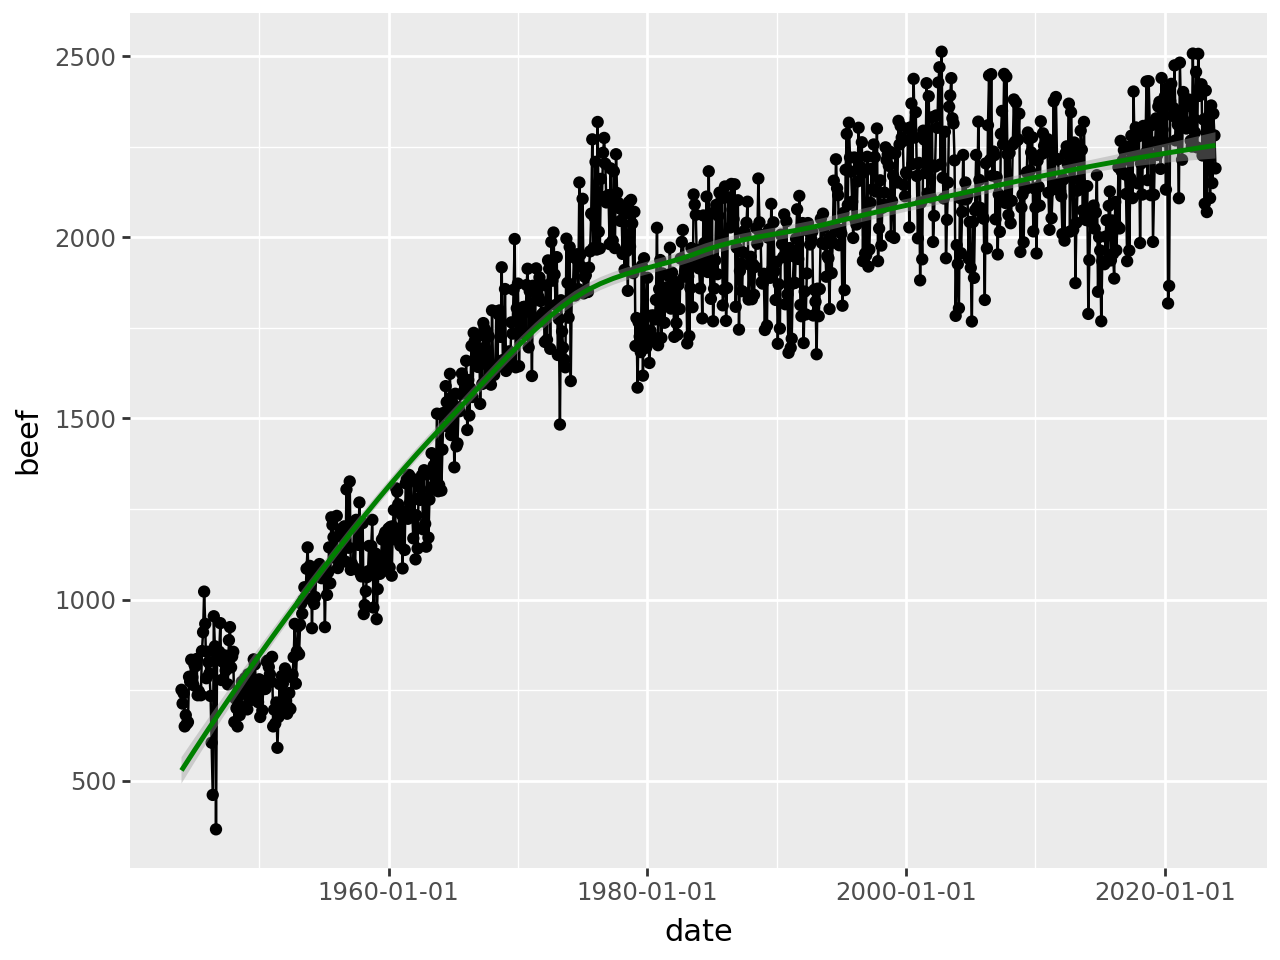

In [31]:
p = ggplot(meat, aes(x='date', y = 'beef')) + geom_line() + geom_point()
p + stat_smooth(color='green')

### Ejercicio 14

El estadístico `geom_density` permite hacer una [estimación de densidad mediante kernels](https://en.wikipedia.org/wiki/Kernel_density_estimation). Añade al histograma normalizado del **Ejercicio 11** una estimación de la función de densidad. Modifica el atributo *adjust* para controlar la suavidad de la estimación. Repite esto mismo separando el *dataset* (usando *facetas*) mediante la variable *sex*. ¿Son las distribuciones similares? Indica tu respuesta.

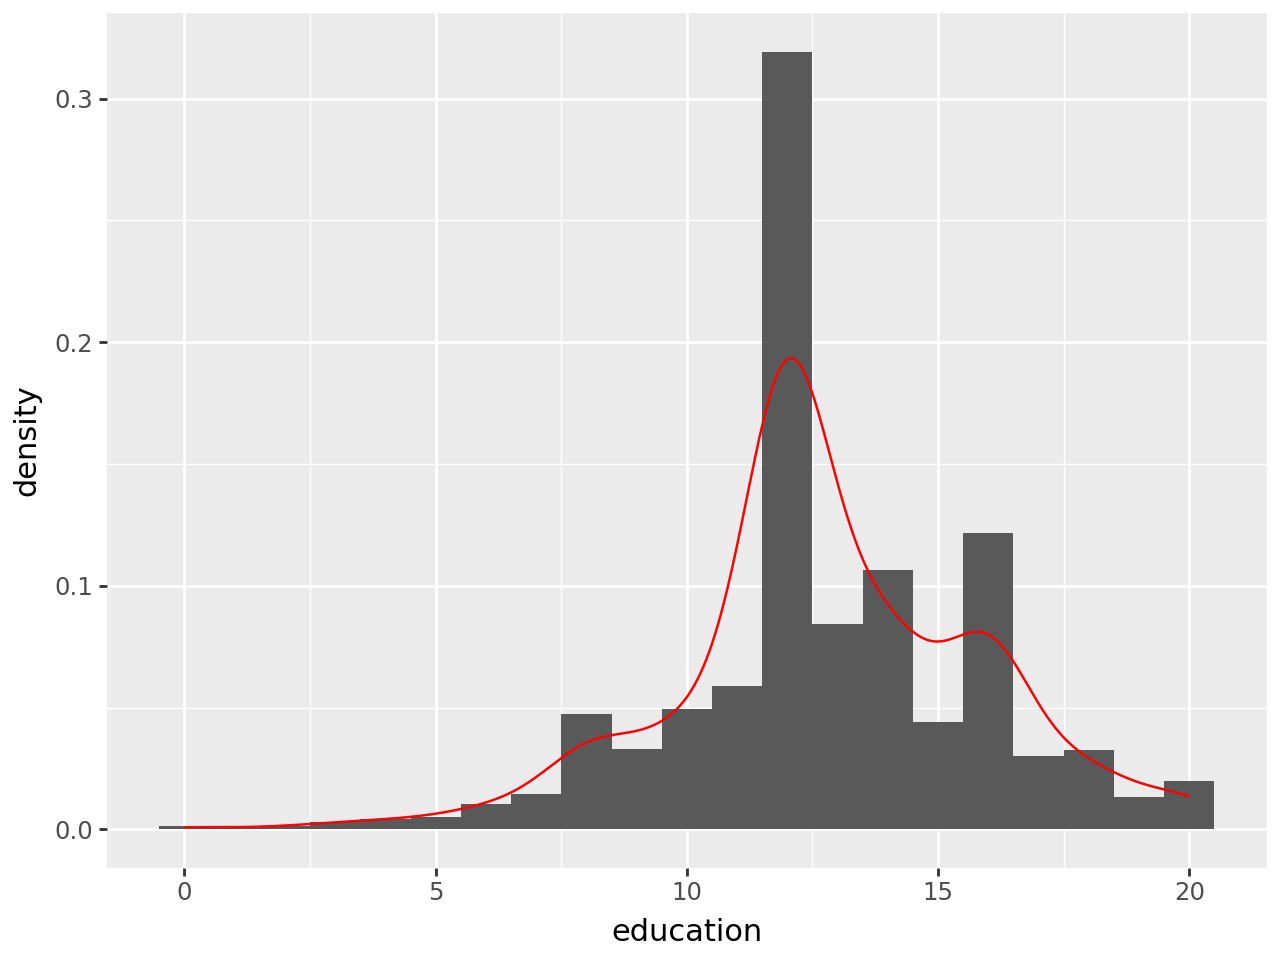

In [32]:
# Escribe la solución
(
    ggplot(vocab, aes(x='education'))
    + geom_histogram(aes(y="..density.."), binwidth=1)
    + geom_density(color="red", adjust=3)
)

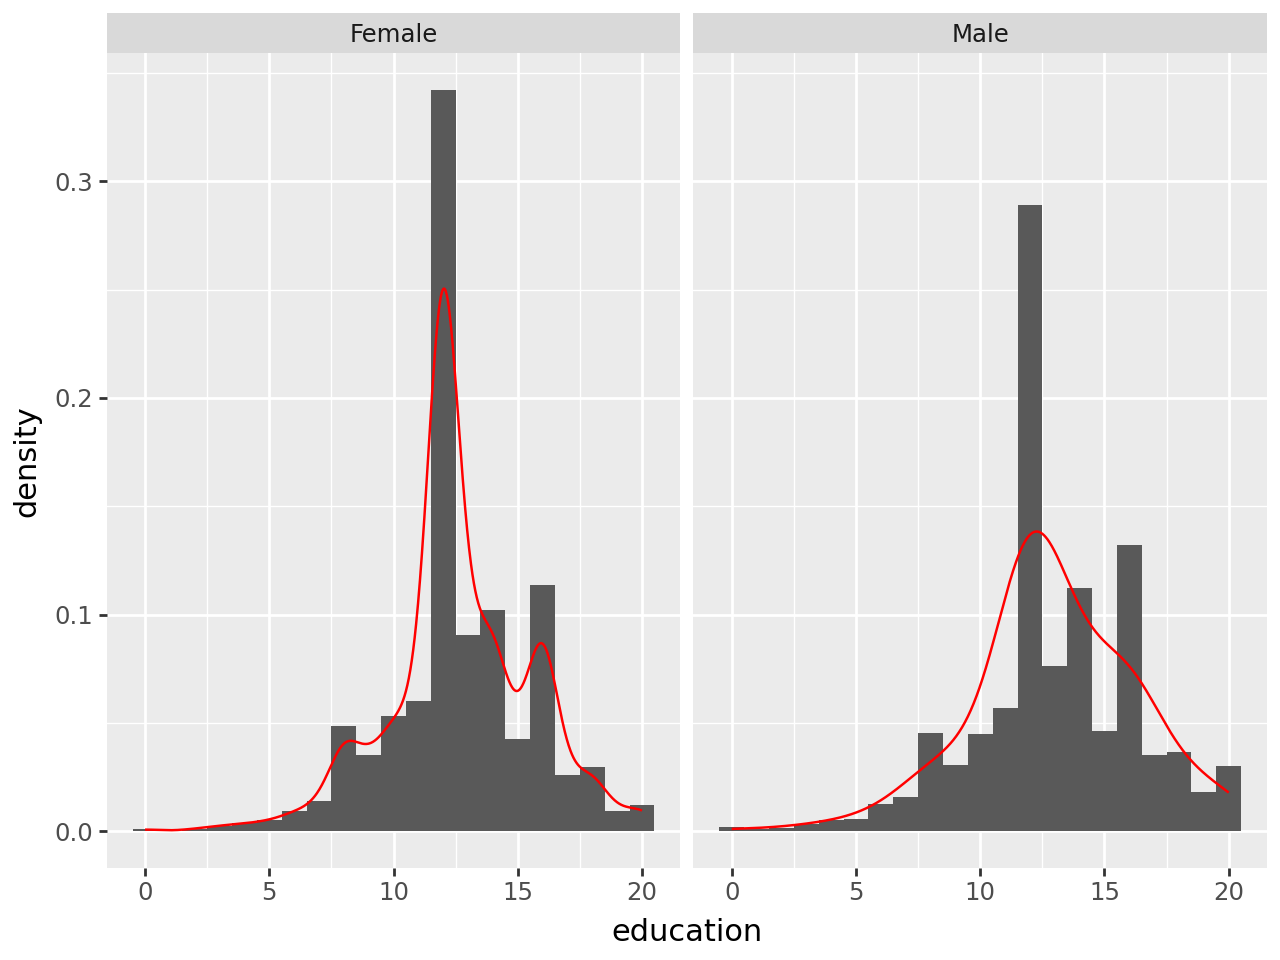

In [33]:
(
    ggplot(vocab, aes(x='education'))
    + geom_histogram(aes(y="..density.."), binwidth=1)
    + geom_density(color="red", adjust=3)
    + facet_wrap("sex")
)

Las distribuciones son muy similares. Los histogramas son idénticos en forma pero la magnitud de "Male" es menor. Por otro lado, la función de densidad si cambia notablemente, aunque la mayoría de los casos se concentran en el mismo punto.

Además de estadísticos directamente asociados con geometrías también existen otras funciones que nos permiten hacer un resumen estadístico de nuestros datos. Para realizar un resumen de nuestros datos emplearemos la función `stat_summary`. Esta función recibe como argumento una función (`fun_data`) con la que calcula los resúmenes estadísticos de los datos. `ggplot` nos ofrece dos funciones muy útiles para eso:

* *mean_cl_normal*: calcula la media y un intervalo de confianza para la misma bajo la asunción de normalidad.
* *mean_cl_boot*: también calcula un intervalo de confianza para la media, pero hace uso de [*bootstraping*](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) para obtener el intervalo sin necesidad de asumir normalidad.

Para este apartado generaremos unos datos aleatorios con alguna distribución estadística concreta con los que así comprobar los resultados. Por ejemplo, generaremos datos siguiendo dos distribuciones normales y agrupados en dos grupos distintos (que llamaremos *1* y *2*). El siguiente código simula los datos:

In [52]:
npoints = 25
# Simular datos de una distribución normal
mean, sd = 3, 1
data1 = np.random.normal(mean, sd, npoints)
mean, sd = 5, 1.5
data2 = np.random.normal(mean, sd, npoints)
value = np.concatenate((data1, data2))
label = np.concatenate(([1] * 25, [2] * 25))
data = pd.DataFrame(np.vstack((value, label)).T, columns=['value', 'label'])
data = data.astype(({'value': float, 'label': 'category'}))
data.head()

value label
0  3.233092   1.0
1  2.209906   1.0
2  3.568333   1.0
3  3.625310   1.0
4  3.180473   1.0

Dado que los datos siguen una distribución normal, para crear un gráfico con los datos y un intervalo de confianza para la media podemos proceder de la siguiente forma:

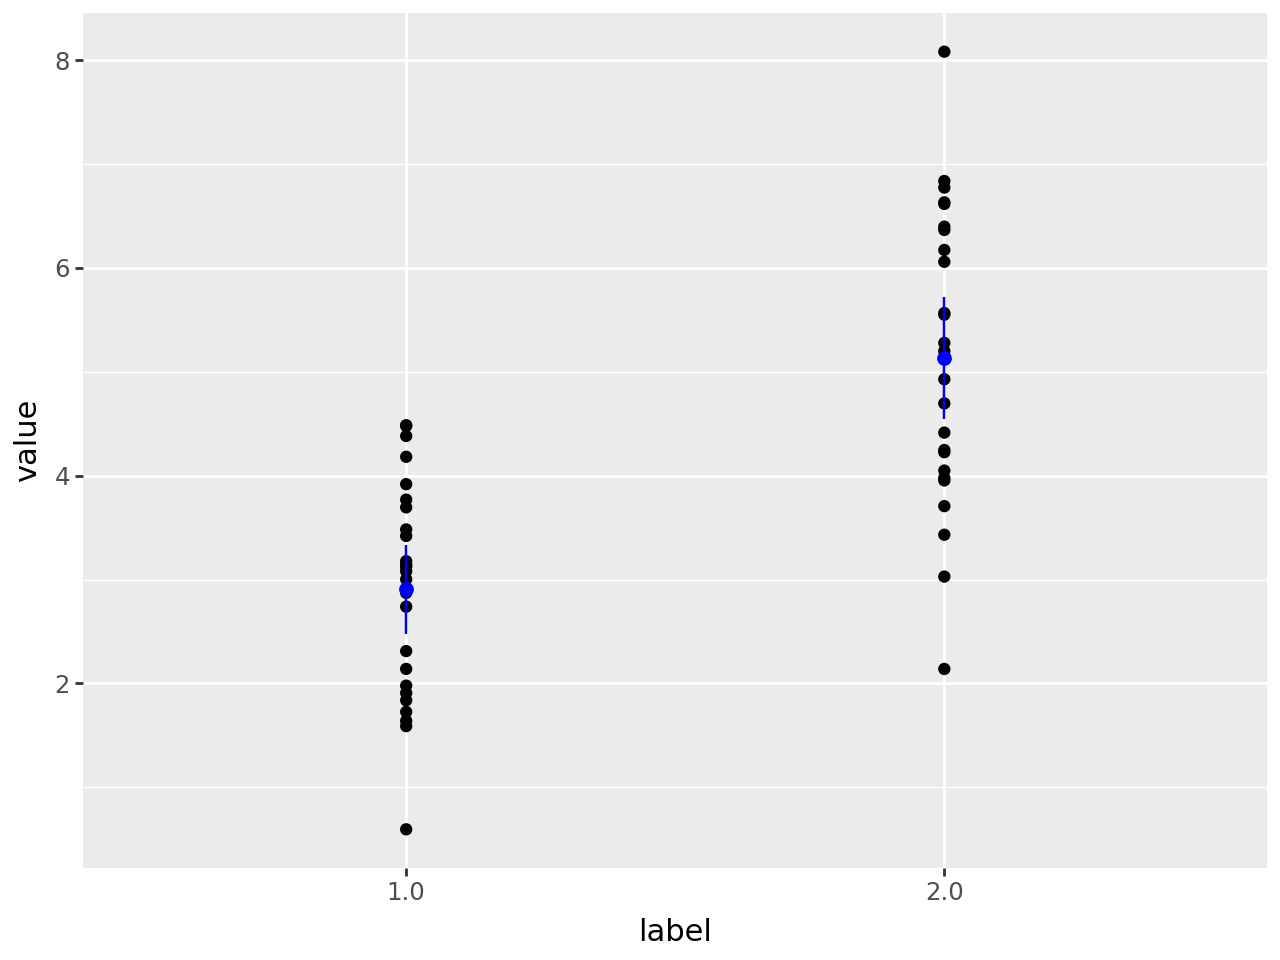

In [35]:
(ggplot(data, aes(x='label', y='value'))
 + geom_point()
 + stat_summary(fun_data='mean_cl_normal', color='blue')
)

Como se puede observar, además de los estadísticos, también hemos dibujado a los propios datos en el gráfico. En general, esto es una buena práctica, ya que si sólo pintamos los estadísticos resumen estamos perdiendo mucha información acerca de los datos (por ejemplo, ¿son simétricos en torno a la media?, ¿hay *outliers*?).

Es de destacar que el intervalo de confianza se ha representado mediante una nueva geometría: `geom_pointrange`, que requiere como atributos estéticos *y*, *ymin* e *ymax*. Esto es importante porque, como veremos luego, podemos implementar nuestras propias funciones de resumen con la única condición de que devuelvan esta salida.

### Ejercicio 15

Mejora el gráfico anterior añadiendo *jitter* y cambiando el tamaño (incrementándolo ligeramente) y color de los estadísticos (eligiendo algún otro que se distinga mejor). En esta ocasión, usa `geom_jitter` en lugar de `geom_point(position='jitter')` y modifica el nivel del ruido en los ejes x e y mediante los parámetros *width* y *height*.

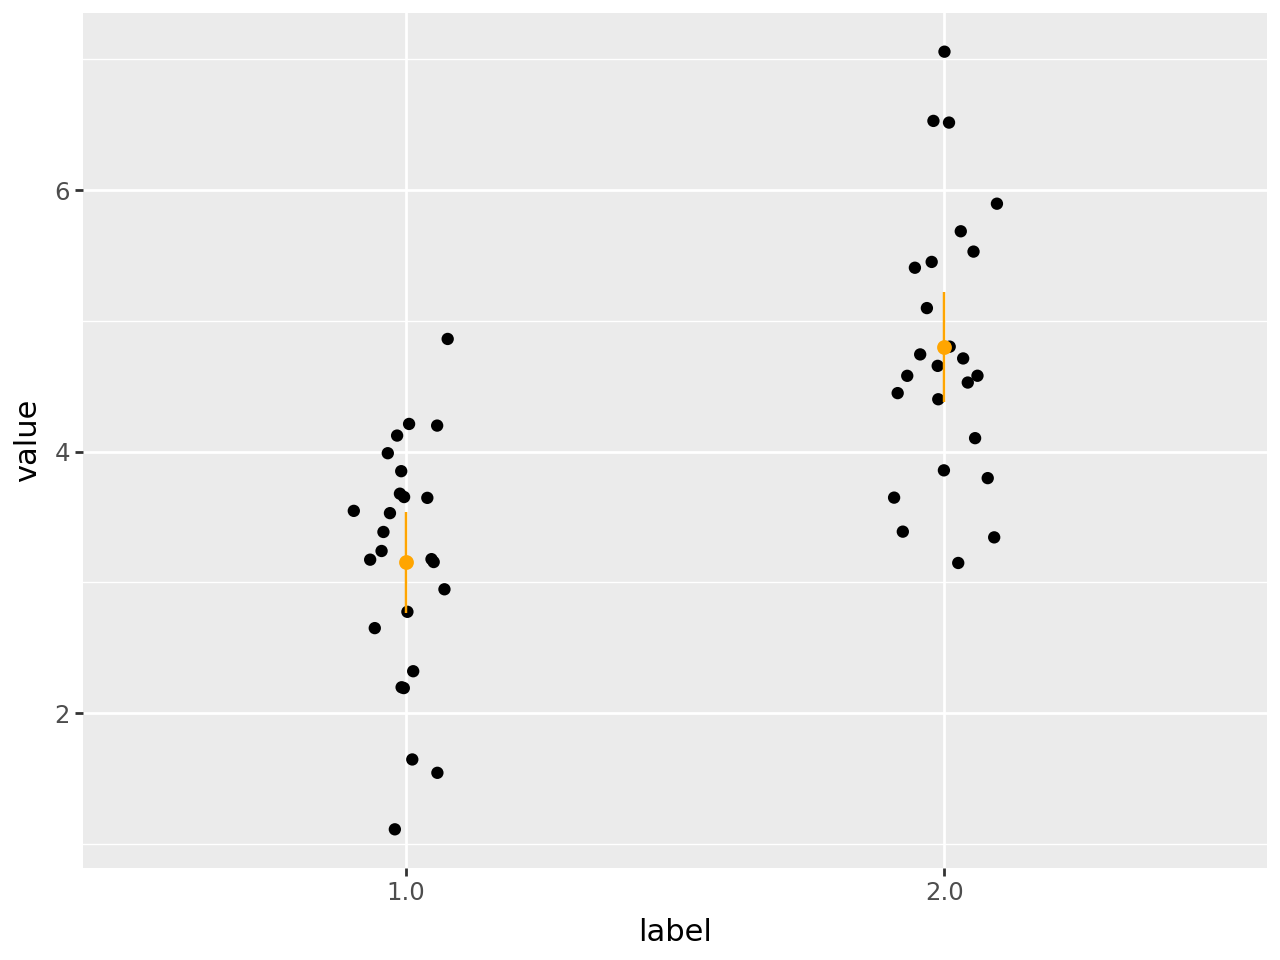

In [53]:
(
    ggplot(data, aes(x='label', y='value'))
    + geom_jitter(width=0.1, height=0.1)
    + stat_summary(fun_data='mean_cl_normal', color='orange')
)

### Ejercicio 16

Usando los datos aleatorios generados en la celda de abajo, obtén un resumen mediante *mean_cl_boot*.

In [54]:
npoints = 20
# Simular datos que no siguen una distribución normal
df = 2
data1 = np.random.chisquare(df, npoints)
df = 1
data2 = np.random.chisquare(df, npoints)
value = np.concatenate((data1, data2))
label = np.concatenate(([1] * 20, [2] * 20))
data = pd.DataFrame(np.vstack((value, label)).T, columns=['value', 'label'])
data = data.astype(({'value': float, 'label': 'category'}))
data.head()

value label
0  1.134688   1.0
1  0.531259   1.0
2  1.445395   1.0
3  1.218840   1.0
4  3.199863   1.0

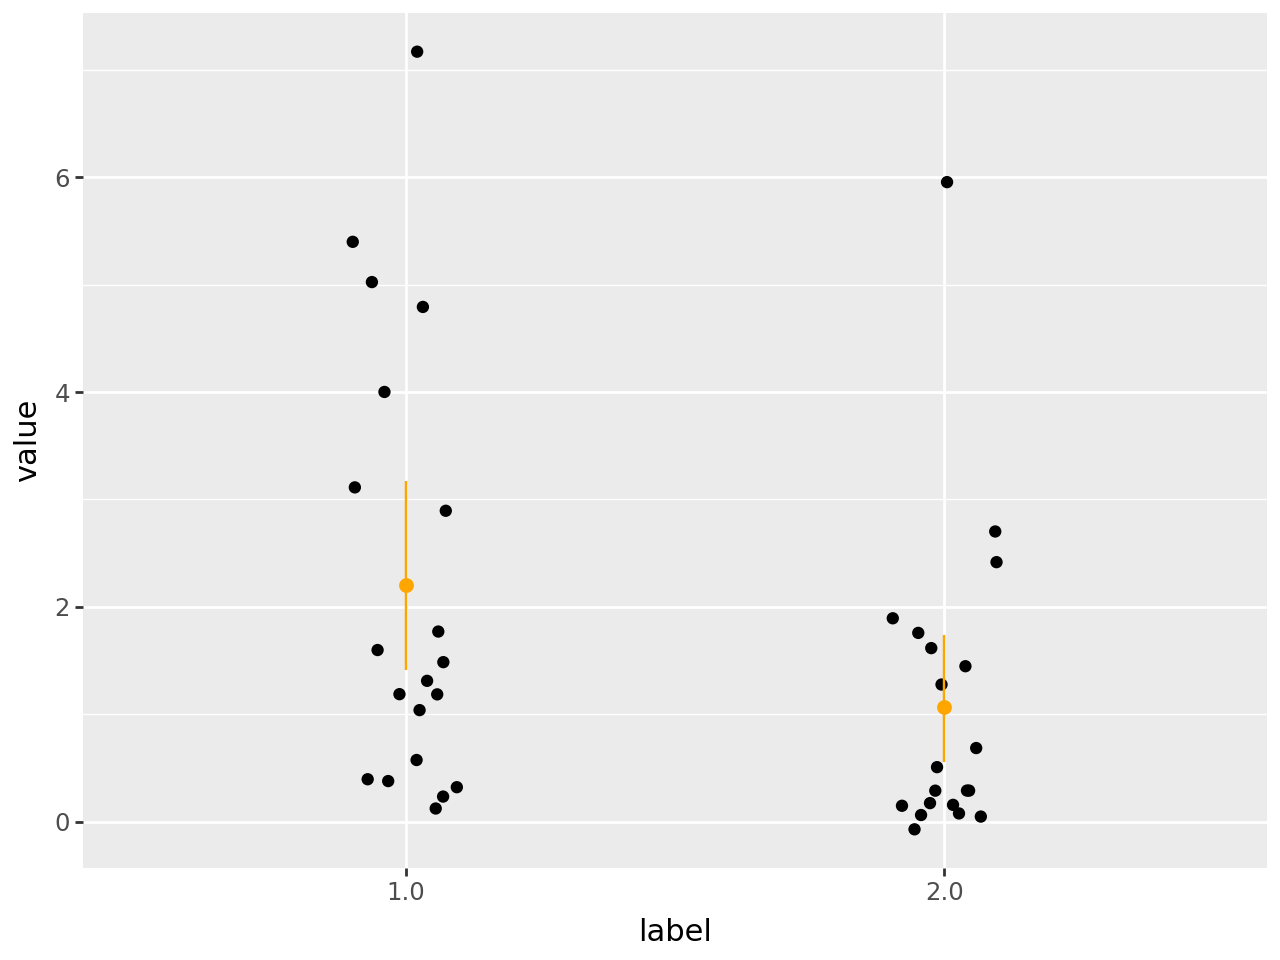

In [55]:
# Escribe la solución
(
    ggplot(data, aes(x='label', y='value'))
    + geom_jitter(width=0.1, height=0.1)
    + stat_summary(fun_data='mean_cl_boot', color='orange')
)

Como hemos mencionado antes podemos crear nuestras propias funciones de resumen con la única condición de que reciban como argumento un vector y devuelvan un `DataFrame` con los valores *y*, *ymin* e *ymax*. En el siguiente ejemplo, se implementa una función sin mucha utilidad estadística que devuelve el mínimo, la mediana y el máximo de una serie de datos:

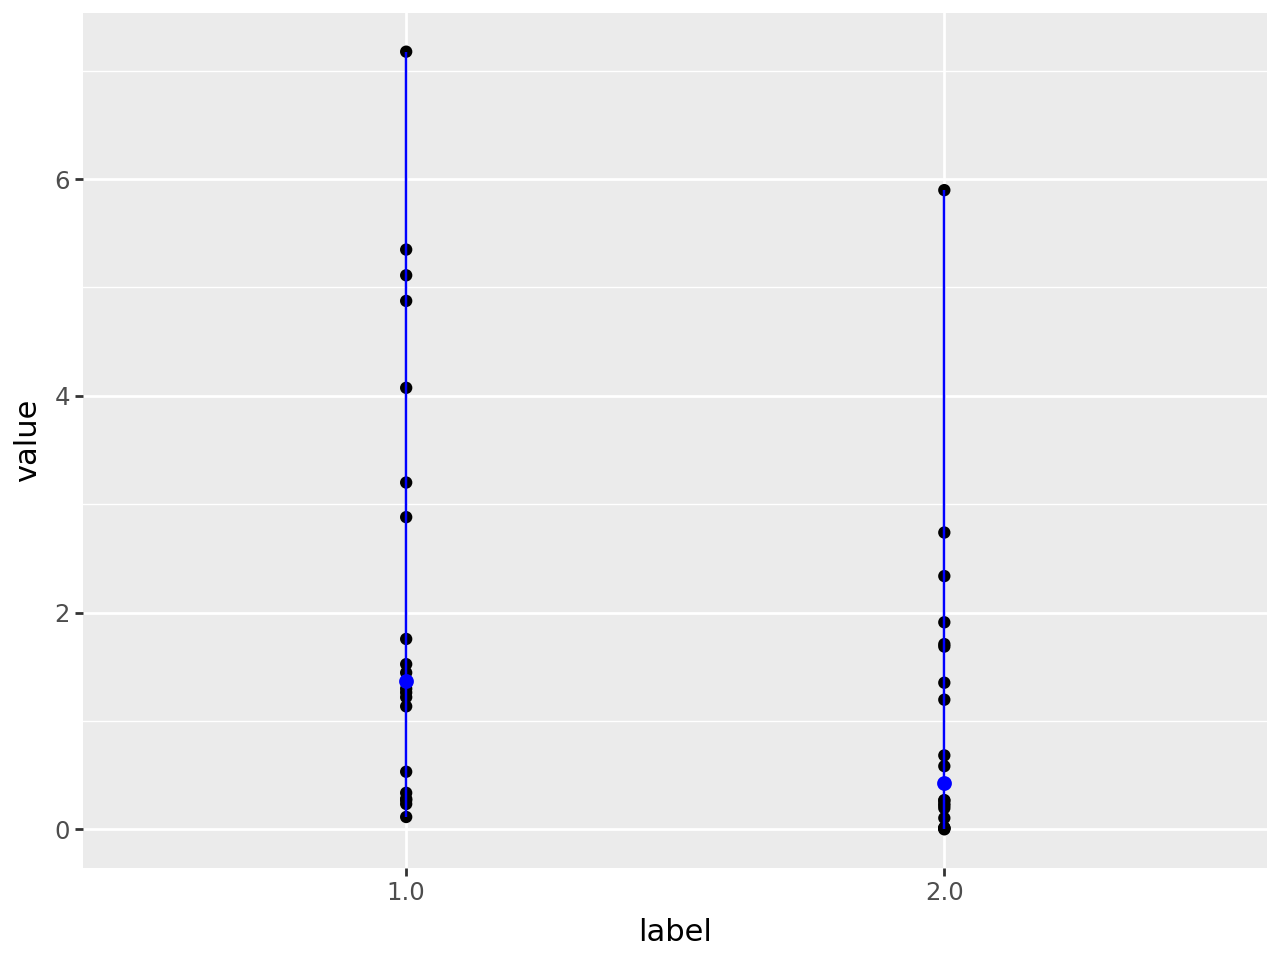

In [56]:
# Esta función no es muy útil
def useless(serie):
    return pd.DataFrame([[serie.median(), serie.min(), serie.max()]],
        columns=['y', 'ymin', 'ymax'])

ggplot(data, aes(x='label', y='value')) + geom_point() + stat_summary(fun_data=useless, color='blue')

### Ejercicio 17

Implementa una función que devuelva como estadísticos la mediana y los percentiles 0.10 y 0.90 (usa la función [`quantile` de pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)). Utiliza esta función en combinación con `stat_summary` sobre los datos sintéticos anteriores. Recuerda mejorar el plot anterior añadiendo *jitter*.

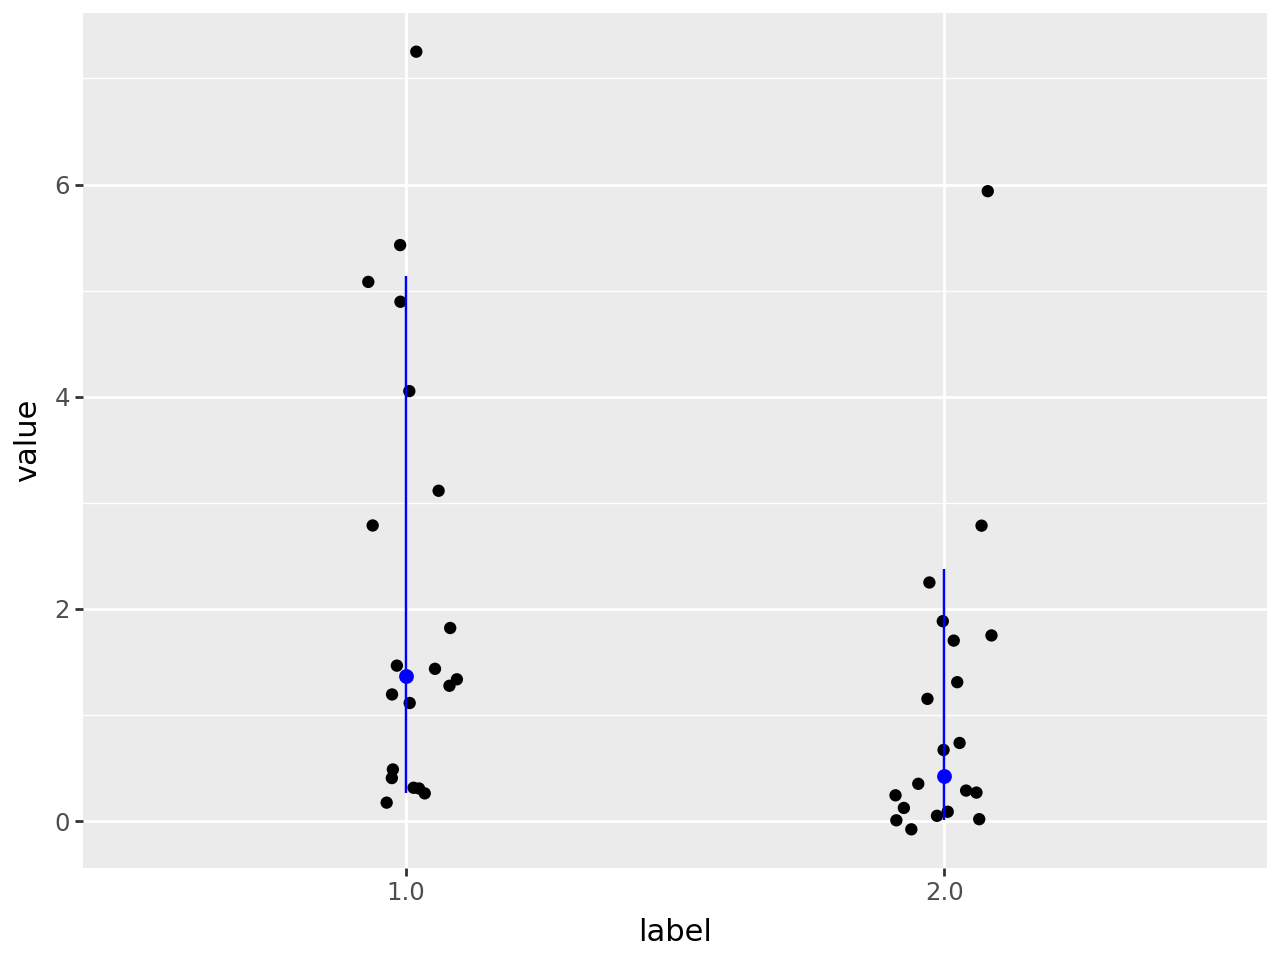

In [58]:
# Escribe la solución
def stadistics(serie):
    return pd.DataFrame([[
            serie.median(), 
            serie.quantile(q=0.1), 
            serie.quantile(q=0.9)
        ]],
        columns=['y', 'ymin', 'ymax'])

(
    ggplot(data, aes(x='label', y='value')) 
    + geom_jitter(width=0.1, height=0.1)
    + stat_summary(fun_data=stadistics, color='blue')
)

## Diagramas de caja y bigotes y diagramas de violín

Aunque nos hemos entretenido usando las funciones resumen, podríamos haber conseguido un efecto similar mediante los clásicos diagramas de caja y bigotes (`geom_boxplot`) o los [diagramas de violín](https://en.wikipedia.org/wiki/Violin_plot) (`geom_violin`).

### Ejercicio 18

Usando los datos del ejercicio anterior, crea un *boxplot* y un *violin plot*. Añade por encima de ellos los propios puntos con *jitter*. Normalmente los *boxplots* suelen pintar *outliers*. Evita pintarlos dos veces (una mediante `geom_boxplot` y otra mediante `geom_jitter`) con el atributo *outlier_shape* de `geom_boxplot`.

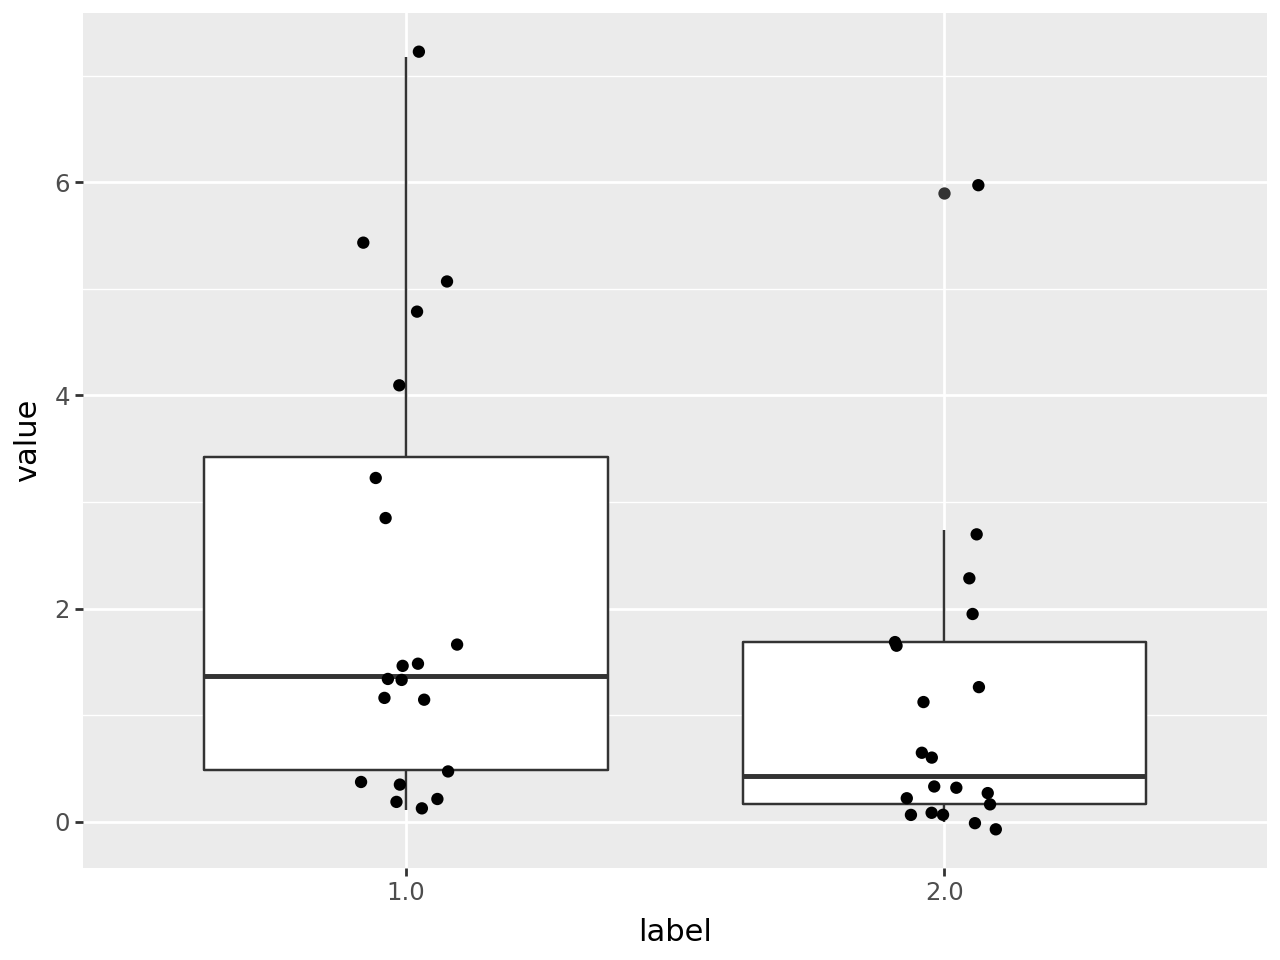

In [59]:
# Escribe la solución
(
    ggplot(data, aes(x='label', y='value'))
    + geom_boxplot()
    + geom_jitter(width=0.1, height=0.1)
)

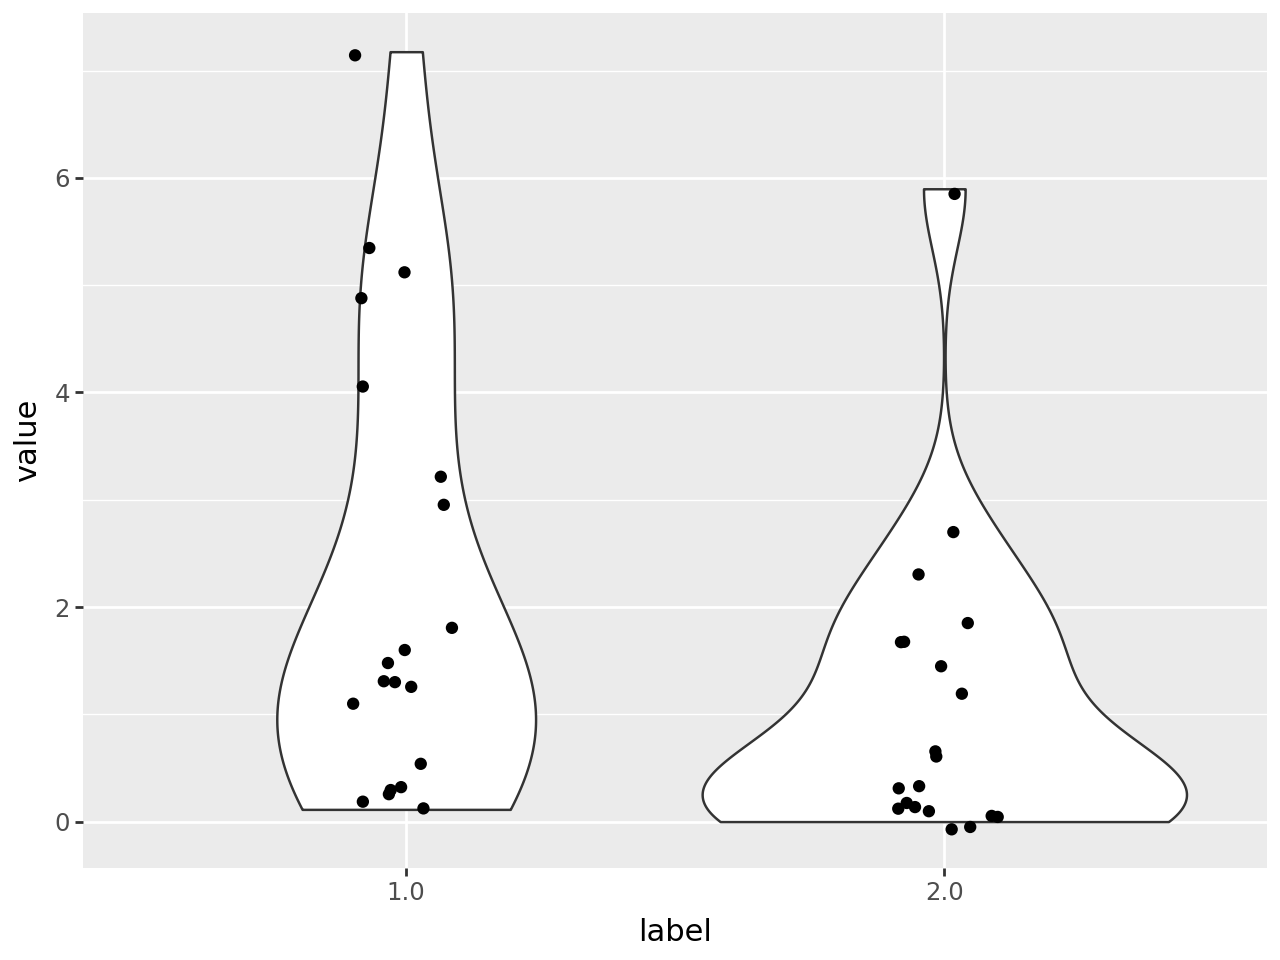

In [60]:
# Escribe la solución
(
    ggplot(data, aes(x='label', y='value'))
    + geom_violin()
    + geom_jitter(width=0.1, height=0.1)
)

## Anotaciones y temas

Finalmente, veremos cómo podemos dar un título a nuestros gráficos y cómo podemos modificar su aspecto estético final. Mediante los llamados **temas**, `ggplot` permite  al usuario controlar cualquier elemento del gráfico no relacionado directamente con los datos. De hecho, es posible crear y editar cualquier tema para personalizar nuestros gráficos. Para modificar el tema aplicado a un gráfico emplearemos la función `theme_xxx` siendo `xxx` el nombre del tema. Este esquema sigue con la filosofía de construir gráficas mediante la combinación de distintas capas.

### Ejercicio 19

Guarda el diagrama de dispersión de *vocabulary* vs. *education* (nuestra versión con *jitter* ) en una variable y luego aplícale distintos temas. Puedes ver los temas que hay disponibles [explorando un poco](https://plotnine.org/reference/#themes).


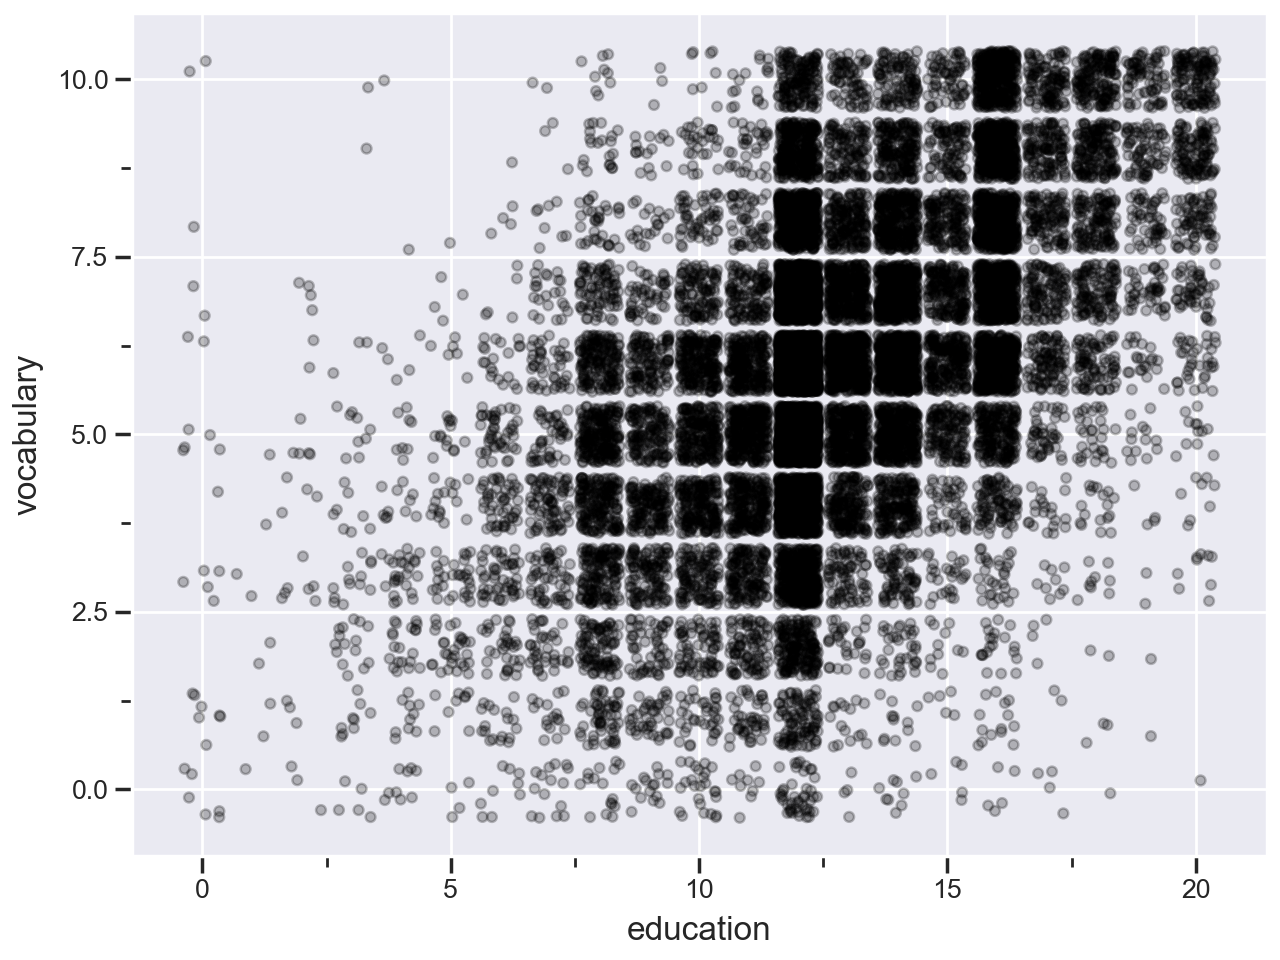

In [61]:
# Escribe la solución
p = (
    ggplot(vocab, aes(x='education', y='vocabulary'))
    + geom_point(position="jitter", alpha=0.25)
)
p + theme_seaborn()

Finalmente, aunque `ggplot` incluye automáticamente un nombre para los ejes x e y, puede ser necesario modificarlos, por ejemplo para que queden más claros o indicar las unidades de medida. También suele ser una buena idea incluir un título que aclare qué es lo que se está representando en la gráfica.

![Los ejes siempre con títulos](http://imgs.xkcd.com/comics/convincing.png)

### Ejercicio 20

Utiliza las funciones `xlab`, `ylab` y `ggtitle` para modificar los nombres de los ejes y el título de nuestro gráfico anterior.

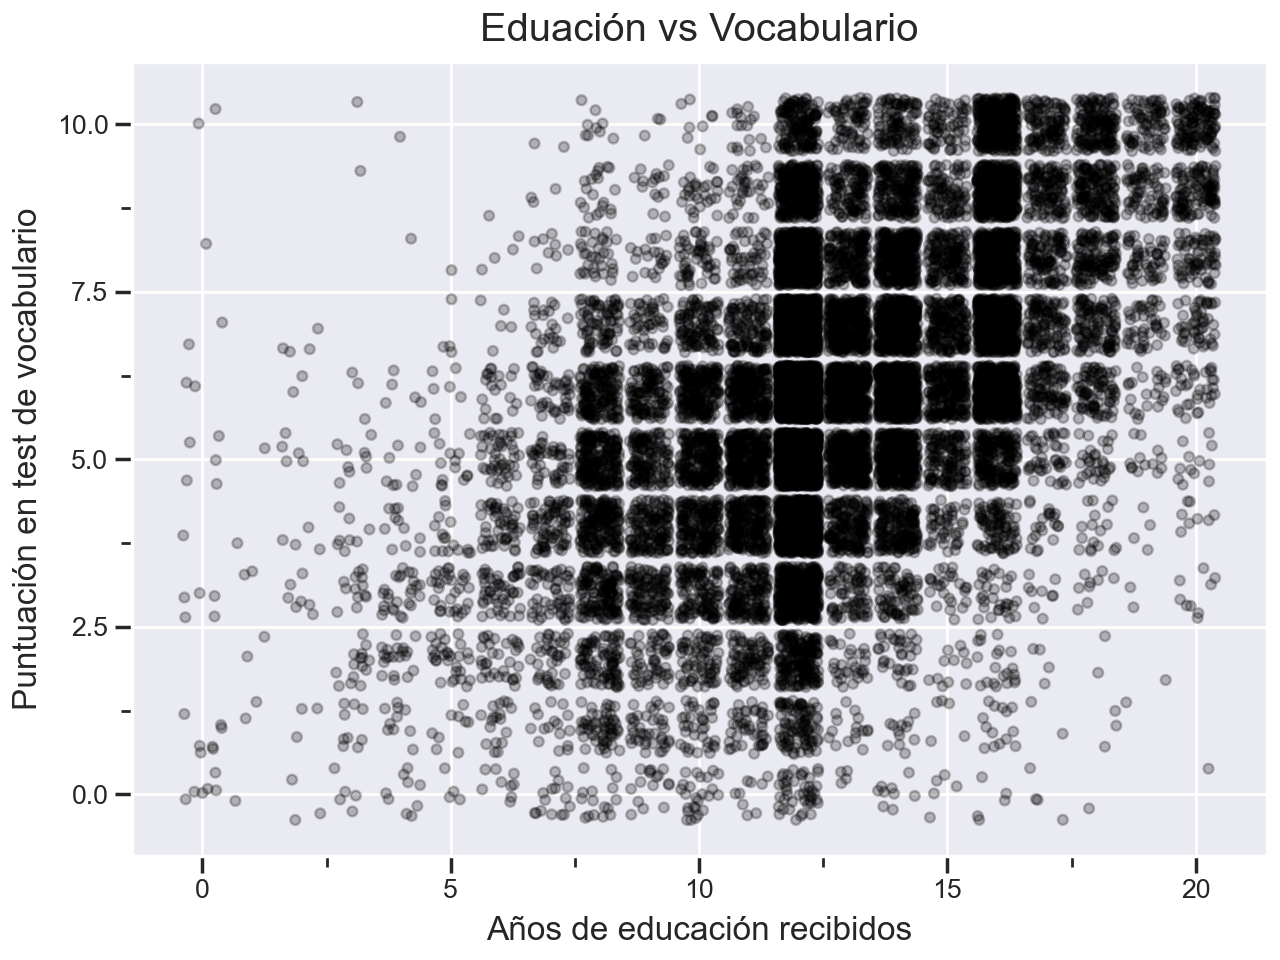

In [62]:
# Escribe la solución
p = (
    ggplot(vocab, aes(x='education', y='vocabulary'))
    + geom_point(position="jitter", alpha=0.25)
    + labs(
            x="Años de educación recibidos", 
            y="Puntuación en test de vocabulario",
            title="Eduación vs Vocabulario"
        )
)
(
    p + theme_seaborn()
)